In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('drebin-215-dataset-5560malware-9476-benign.csv', delimiter=',')

C:\Users\estre\AppData\Local\Temp\ipykernel_16496\1027246833.py:1: DtypeWarning: Columns (92) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('drebin-215-dataset-5560malware-9476-benign.csv', delimiter=',')


In [3]:
class_maping={'B':0, 'S':1}
data['class'] = data['class'].map(class_maping)

In [4]:
data_variable_strange = data['TelephonyManager.getSimCountryIso']

In [5]:
data = data.drop(columns='TelephonyManager.getSimCountryIso')

In [6]:
data = data.drop_duplicates()
print("Número de duplicados después de eliminar:", data.duplicated().sum())

Número de duplicados después de eliminar: 0


In [7]:
labels = data['class']
features = data.drop(columns='class')

In [8]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Seleccionar las k mejores características basadas en chi-cuadrado
k = 6  
selector = SelectKBest(chi2, k=k)
X_new = selector.fit_transform(features, labels)

# Obtener las máscaras de características seleccionadas
mask = selector.get_support()

# Obtener los nombres de las características seleccionadas
selected_features = [feature for feature, selected in zip(features.columns, mask) if selected]

print("Características seleccionadas:", selected_features)

Características seleccionadas: ['transact', 'onServiceConnected', 'bindService', 'attachInterface', 'ServiceConnection', 'WRITE_HISTORY_BOOKMARKS']


In [9]:
selected_features_df = data[selected_features]
selected_features_df['class'] = data['class']
selected_features_df.head()

C:\Users\estre\AppData\Local\Temp\ipykernel_16496\4006591218.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_features_df['class'] = data['class']


,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,WRITE_HISTORY_BOOKMARKS,class
0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1
4,0,0,0,0,0,1,1


In [10]:
print(X_new.shape, labels.shape)

(7250, 6) (7250,)


In [11]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(selected_features_df, test_size=0.2, random_state=123)

In [12]:
from sklearn.utils import resample
clase_0 = train_data[train_data['class']== 0]
clase_1 = train_data[train_data['class']== 1]
class_0_subsampled = resample(clase_0, replace=False, n_samples=len(clase_1), random_state=123)

# Combina las clases equitativamente.
data_train = pd.concat([clase_1, class_0_subsampled])

In [13]:
labels_train = data_train['class']
features_train = data_train.drop(columns='class')
labels_test = test_data['class']
features_test = test_data.drop(columns='class')

#### Cuántica

In [14]:
!pip install pylatexenc

In [15]:
!pip install openpyxl

In [16]:
!pip install qiskit

In [17]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

svc = SVC()
_ = svc.fit(features_train, labels_train)  

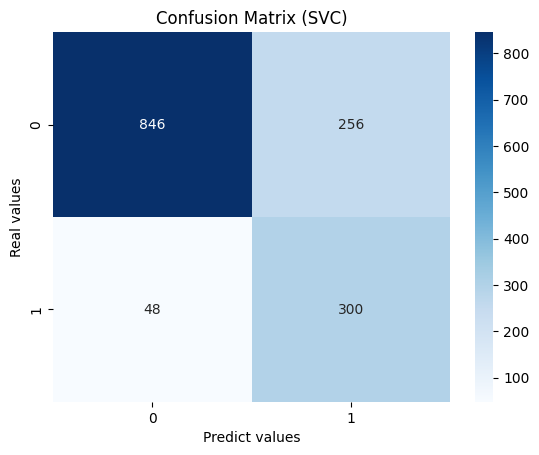

In [18]:
predictions = svc.predict(features_test)
import matplotlib.pyplot as plot
import seaborn as sns
confusion = confusion_matrix(labels_test, predictions)
sns.heatmap(confusion, annot = True, cmap = "Blues", fmt = "d")
plot.xlabel("Predict values")
plot.ylabel("Real values")
plot.title("Confusion Matrix (SVC)")
plot.show()

In [19]:
train_score_c4 = svc.score(features_train, labels_train)
test_score_c4 = svc.score(features_test, labels_test)


print(f"Classical SVC on the training dataset: {train_score_c4:.2f}")
print(f"Classical SVC on the test dataset:     {test_score_c4:.2f}")

Classical SVC on the training dataset: 0.80
Classical SVC on the test dataset:     0.79


In [20]:
from sklearn.metrics import classification_report
print(classification_report(labels_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.77      0.85      1102
           1       0.54      0.86      0.66       348

    accuracy                           0.79      1450
   macro avg       0.74      0.81      0.76      1450
weighted avg       0.85      0.79      0.80      1450



In [21]:
num_obs_per_class = 100
selected_data = []

# Iterar sobre cada clase
for clase in data['class'].unique():
    # Seleccionar aleatoriamente 'num_obs_per_class' observaciones de cada clase
    selected_subset = selected_features_df[selected_features_df['class'] == clase].sample(n=num_obs_per_class, random_state=123)
    
    # Agregar el subconjunto seleccionado a la lista
    selected_data.append(selected_subset)

# Crear un nuevo DataFrame con las observaciones seleccionadas
selected_df = pd.concat(selected_data)

In [22]:
selected_df = selected_df.reset_index(drop=True)

In [23]:
labels = selected_df['class']
features = selected_df.drop(columns='class')

In [24]:
from sklearn.model_selection import train_test_split
# train_data, test_data = train_test_split(selected_df, test_size=0.2, random_state=123)
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.2, random_state=123)

In [25]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

svc = SVC()
_ = svc.fit(features_train, labels_train) 

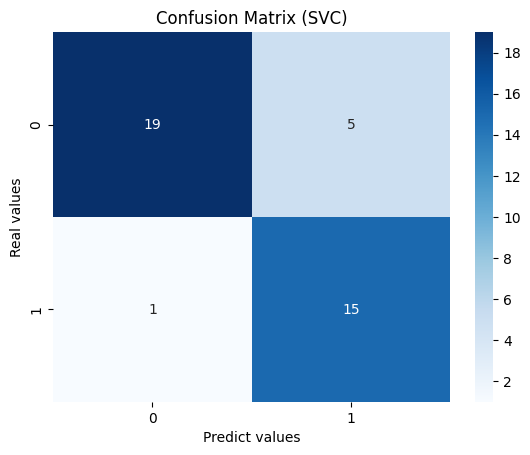

In [26]:
predictions = svc.predict(features_test)
import matplotlib.pyplot as plot
confusion = confusion_matrix(labels_test, predictions)
sns.heatmap(confusion, annot = True, cmap = "Blues", fmt = "d")
plot.xlabel("Predict values")
plot.ylabel("Real values")
plot.title("Confusion Matrix (SVC)")
plot.show()

In [27]:
train_score_c4 = svc.score(features_train, labels_train)
test_score_c4 = svc.score(features_test, labels_test)


print(f"Classical SVC on the training dataset: {train_score_c4:.2f}")
print(f"Classical SVC on the test dataset:     {test_score_c4:.2f}")

Classical SVC on the training dataset: 0.83
Classical SVC on the test dataset:     0.85


c:\Users\estre\AppData\Local\Programs\Python\Python311\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


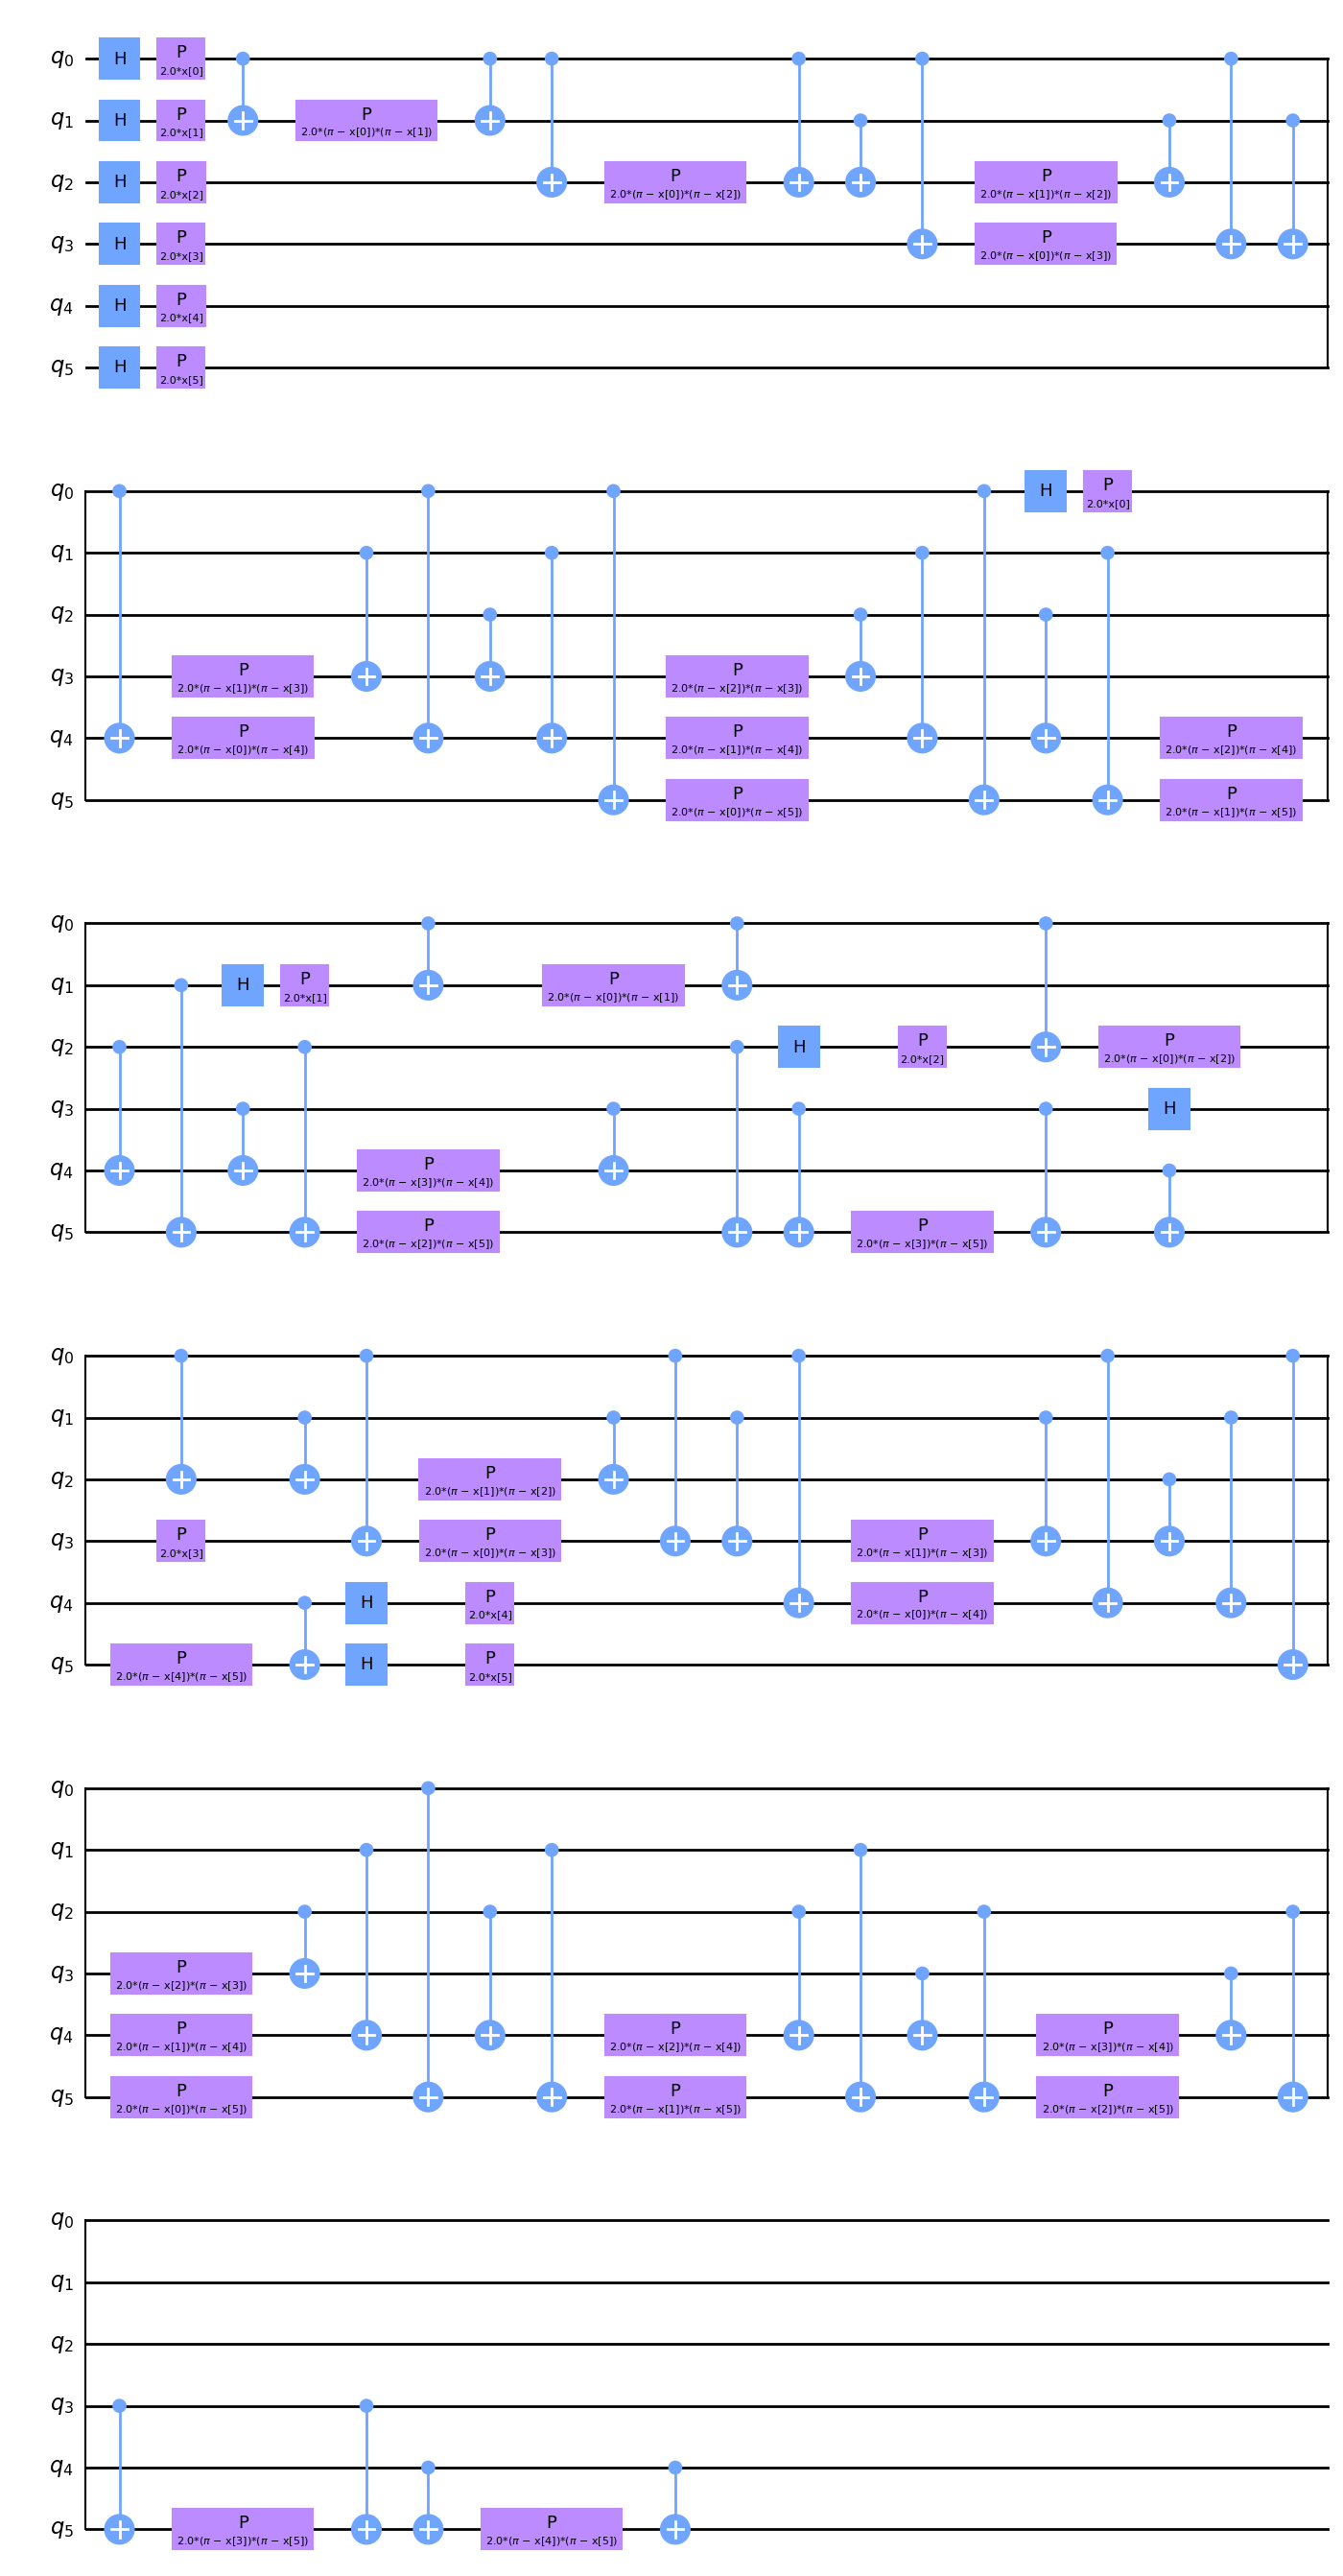

In [28]:
from qiskit.circuit.library import ZZFeatureMap
import matplotlib.pyplot as plt
num_features = features.shape[1]
feature_map = ZZFeatureMap(feature_dimension=num_features, reps=2)
feature_map.decompose().draw(output="mpl", fold=20)

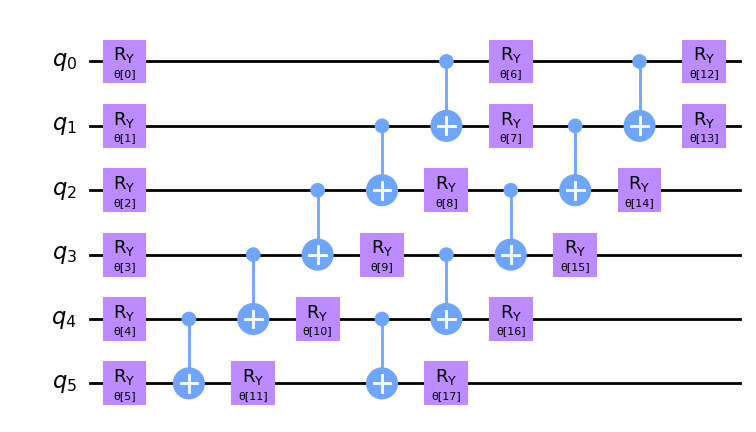

In [29]:
from qiskit.circuit.library import RealAmplitudes
ansatz = RealAmplitudes(num_qubits=num_features, reps=2)
ansatz.decompose().draw(output="mpl", fold=20)

## SLSQP

In [30]:
from qiskit.algorithms.optimizers import SLSQP
optimizer = SLSQP(maxiter=25)

C:\Users\estre\AppData\Local\Temp\ipykernel_16496\657383429.py:1: DeprecationWarning: ``qiskit.algorithms`` has been migrated to an independent package: https://github.com/qiskit-community/qiskit-algorithms. The ``qiskit.algorithms`` import path is deprecated as of qiskit-terra 0.25.0 and will be removed in Qiskit 1.0. Please run ``pip install qiskit_algorithms`` and use ``import qiskit_algorithms`` instead.
  from qiskit.algorithms.optimizers import SLSQP


In [31]:
from qiskit.primitives import Sampler

sampler = Sampler()

In [32]:
from matplotlib import pyplot as plt
from IPython.display import clear_output

objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)


def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

In [33]:
!pip install qiskit-machine-learning

In [34]:
import numpy as np
X_train_np = np.array(features_train.values)
y_train_np = labels_train.values

In [35]:
print("Shape of X_train_np:", X_train_np.shape)
print("Shape of y_train_np:", y_train_np.shape)

Shape of X_train_np: (160, 6)
Shape of y_train_np: (160,)


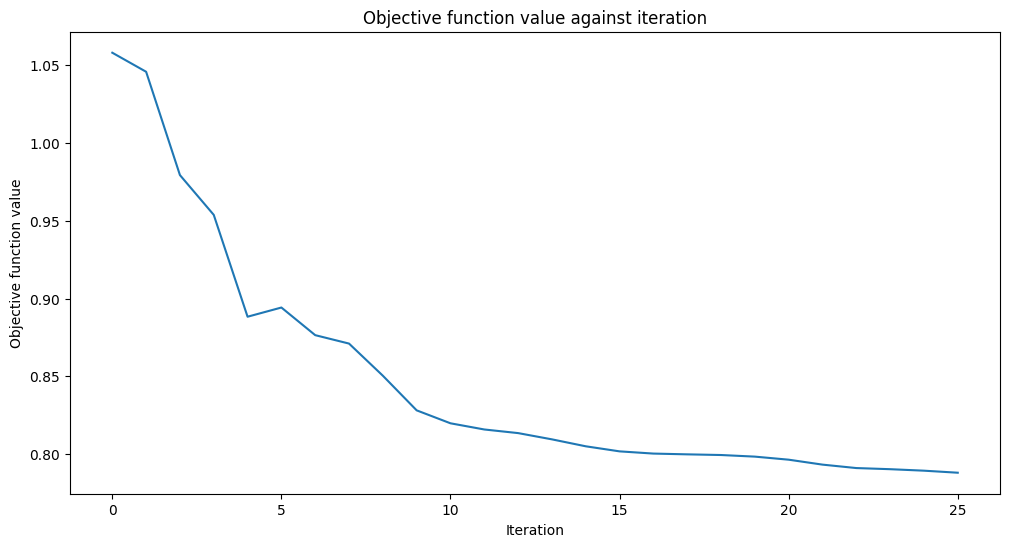

Training time: 3471 seconds


In [36]:
import time
from qiskit_machine_learning.algorithms.classifiers import VQC

vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

objective_func_vals = []

start = time.time()
vqc.fit(X_train_np, y_train_np)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

In [37]:
X_test_np = np.array(features_test.values)
y_test_np = labels_test.values

In [38]:
print("Shape of X_train_np:", X_test_np.shape)
print("Shape of y_train_np:", y_test_np.shape)

Shape of X_train_np: (40, 6)
Shape of y_train_np: (40,)


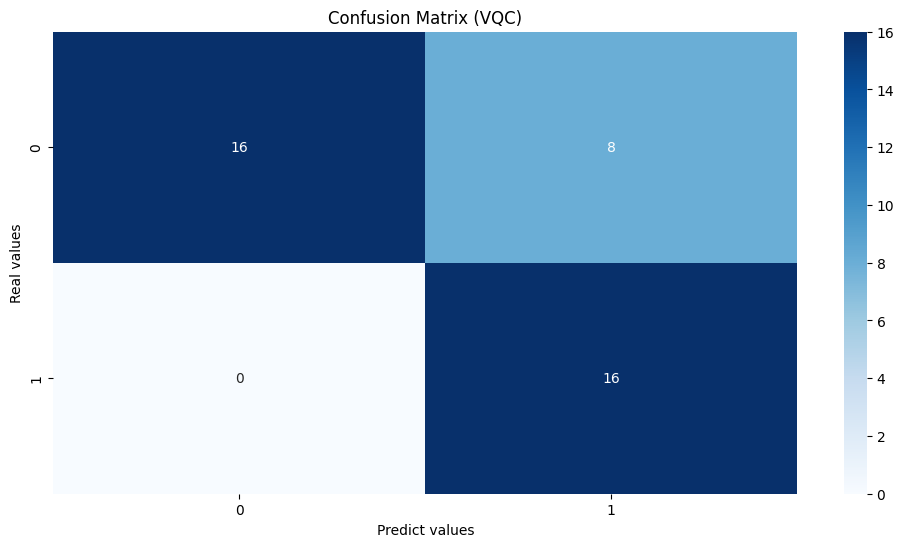

In [39]:
import matplotlib.pyplot as plot
from sklearn.metrics import confusion_matrix
q_predictions = vqc.predict(X_test_np)
confusion2 = confusion_matrix(y_test_np, q_predictions)
sns.heatmap(confusion2, annot = True, cmap = "Blues", fmt = "d")
plot.xlabel("Predict values")
plot.ylabel("Real values")
plot.title("Confusion Matrix (VQC)")
plot.show()

In [40]:
train_score_q4 = vqc.score(X_train_np, y_train_np)
test_score_q4 = vqc.score(X_test_np, y_test_np)

print(f"Quantum VQC on the training dataset: {train_score_q4:.2f}")
print(f"Quantum VQC on the test dataset:     {test_score_q4:.2f}")

Quantum VQC on the training dataset: 0.79
Quantum VQC on the test dataset:     0.80


In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test_np, q_predictions,digits=6))

              precision    recall  f1-score   support

           0   1.000000  0.666667  0.800000        24
           1   0.666667  1.000000  0.800000        16

    accuracy                       0.800000        40
   macro avg   0.833333  0.833333  0.800000        40
weighted avg   0.866667  0.800000  0.800000        40



c:\Users\estre\AppData\Local\Programs\Python\Python311\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


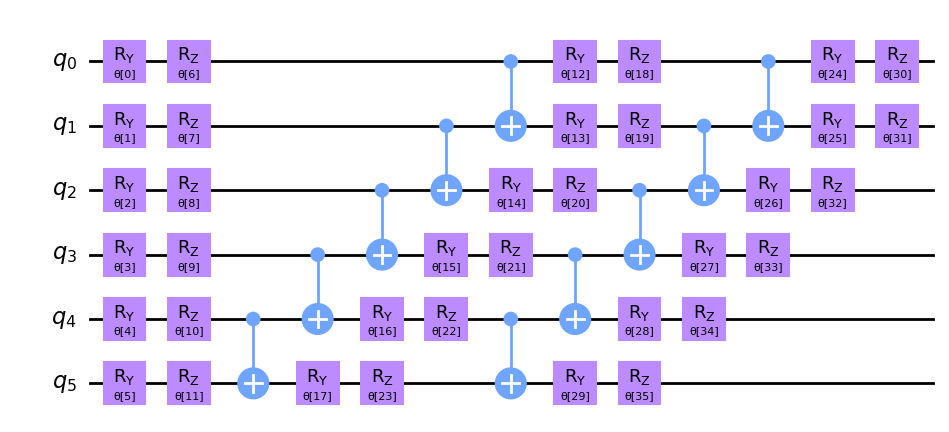

In [42]:
from qiskit.circuit.library import EfficientSU2
ansatz = EfficientSU2(num_qubits=num_features, reps=2)
ansatz.decompose().draw(output="mpl", fold=20)

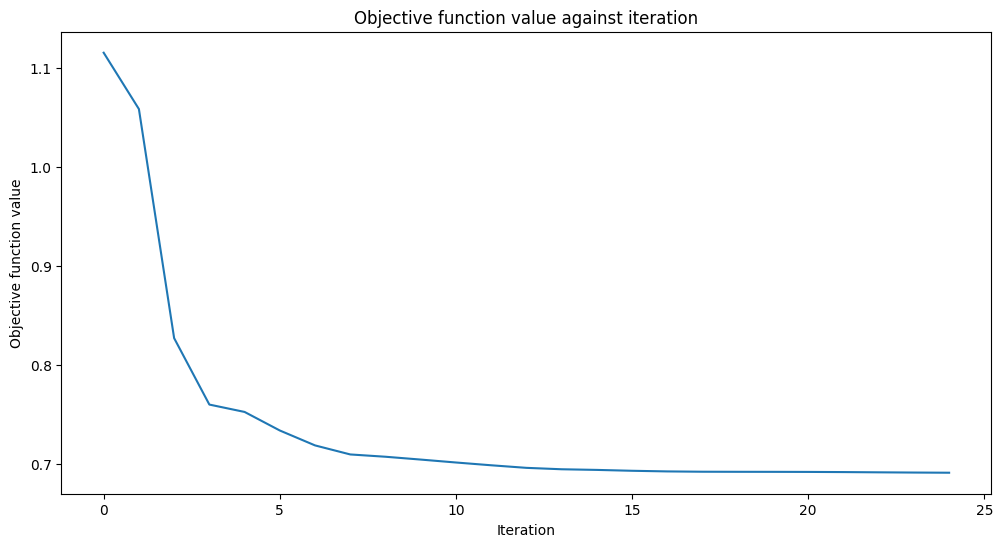

Training time: 8390 seconds


In [43]:
import time
from qiskit_machine_learning.algorithms.classifiers import VQC

vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

objective_func_vals = []

start = time.time()
vqc.fit(X_train_np, y_train_np)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

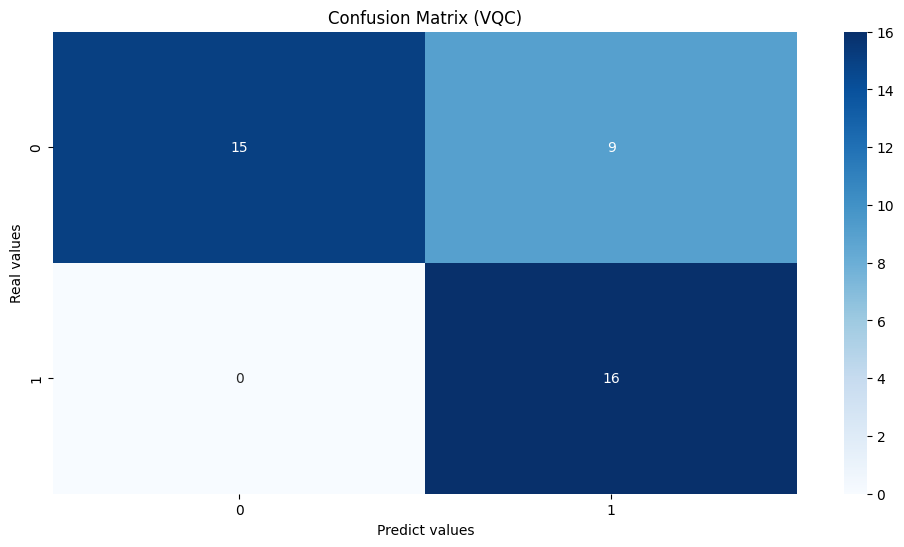

In [44]:
import matplotlib.pyplot as plot
from sklearn.metrics import confusion_matrix
q_predictions = vqc.predict(X_test_np)
confusion2 = confusion_matrix(y_test_np, q_predictions)
sns.heatmap(confusion2, annot = True, cmap = "Blues", fmt = "d")
plot.xlabel("Predict values")
plot.ylabel("Real values")
plot.title("Confusion Matrix (VQC)")
plot.show()

In [45]:
train_score_q4 = vqc.score(X_train_np, y_train_np)
test_score_q4 = vqc.score(X_test_np, y_test_np)

print(f"Quantum VQC on the training dataset: {train_score_q4:.2f}")
print(f"Quantum VQC on the test dataset:     {test_score_q4:.2f}")

Quantum VQC on the training dataset: 0.78
Quantum VQC on the test dataset:     0.78


In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_test_np, q_predictions,digits=6))

              precision    recall  f1-score   support

           0   1.000000  0.625000  0.769231        24
           1   0.640000  1.000000  0.780488        16

    accuracy                       0.775000        40
   macro avg   0.820000  0.812500  0.774859        40
weighted avg   0.856000  0.775000  0.773734        40



c:\Users\estre\AppData\Local\Programs\Python\Python311\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


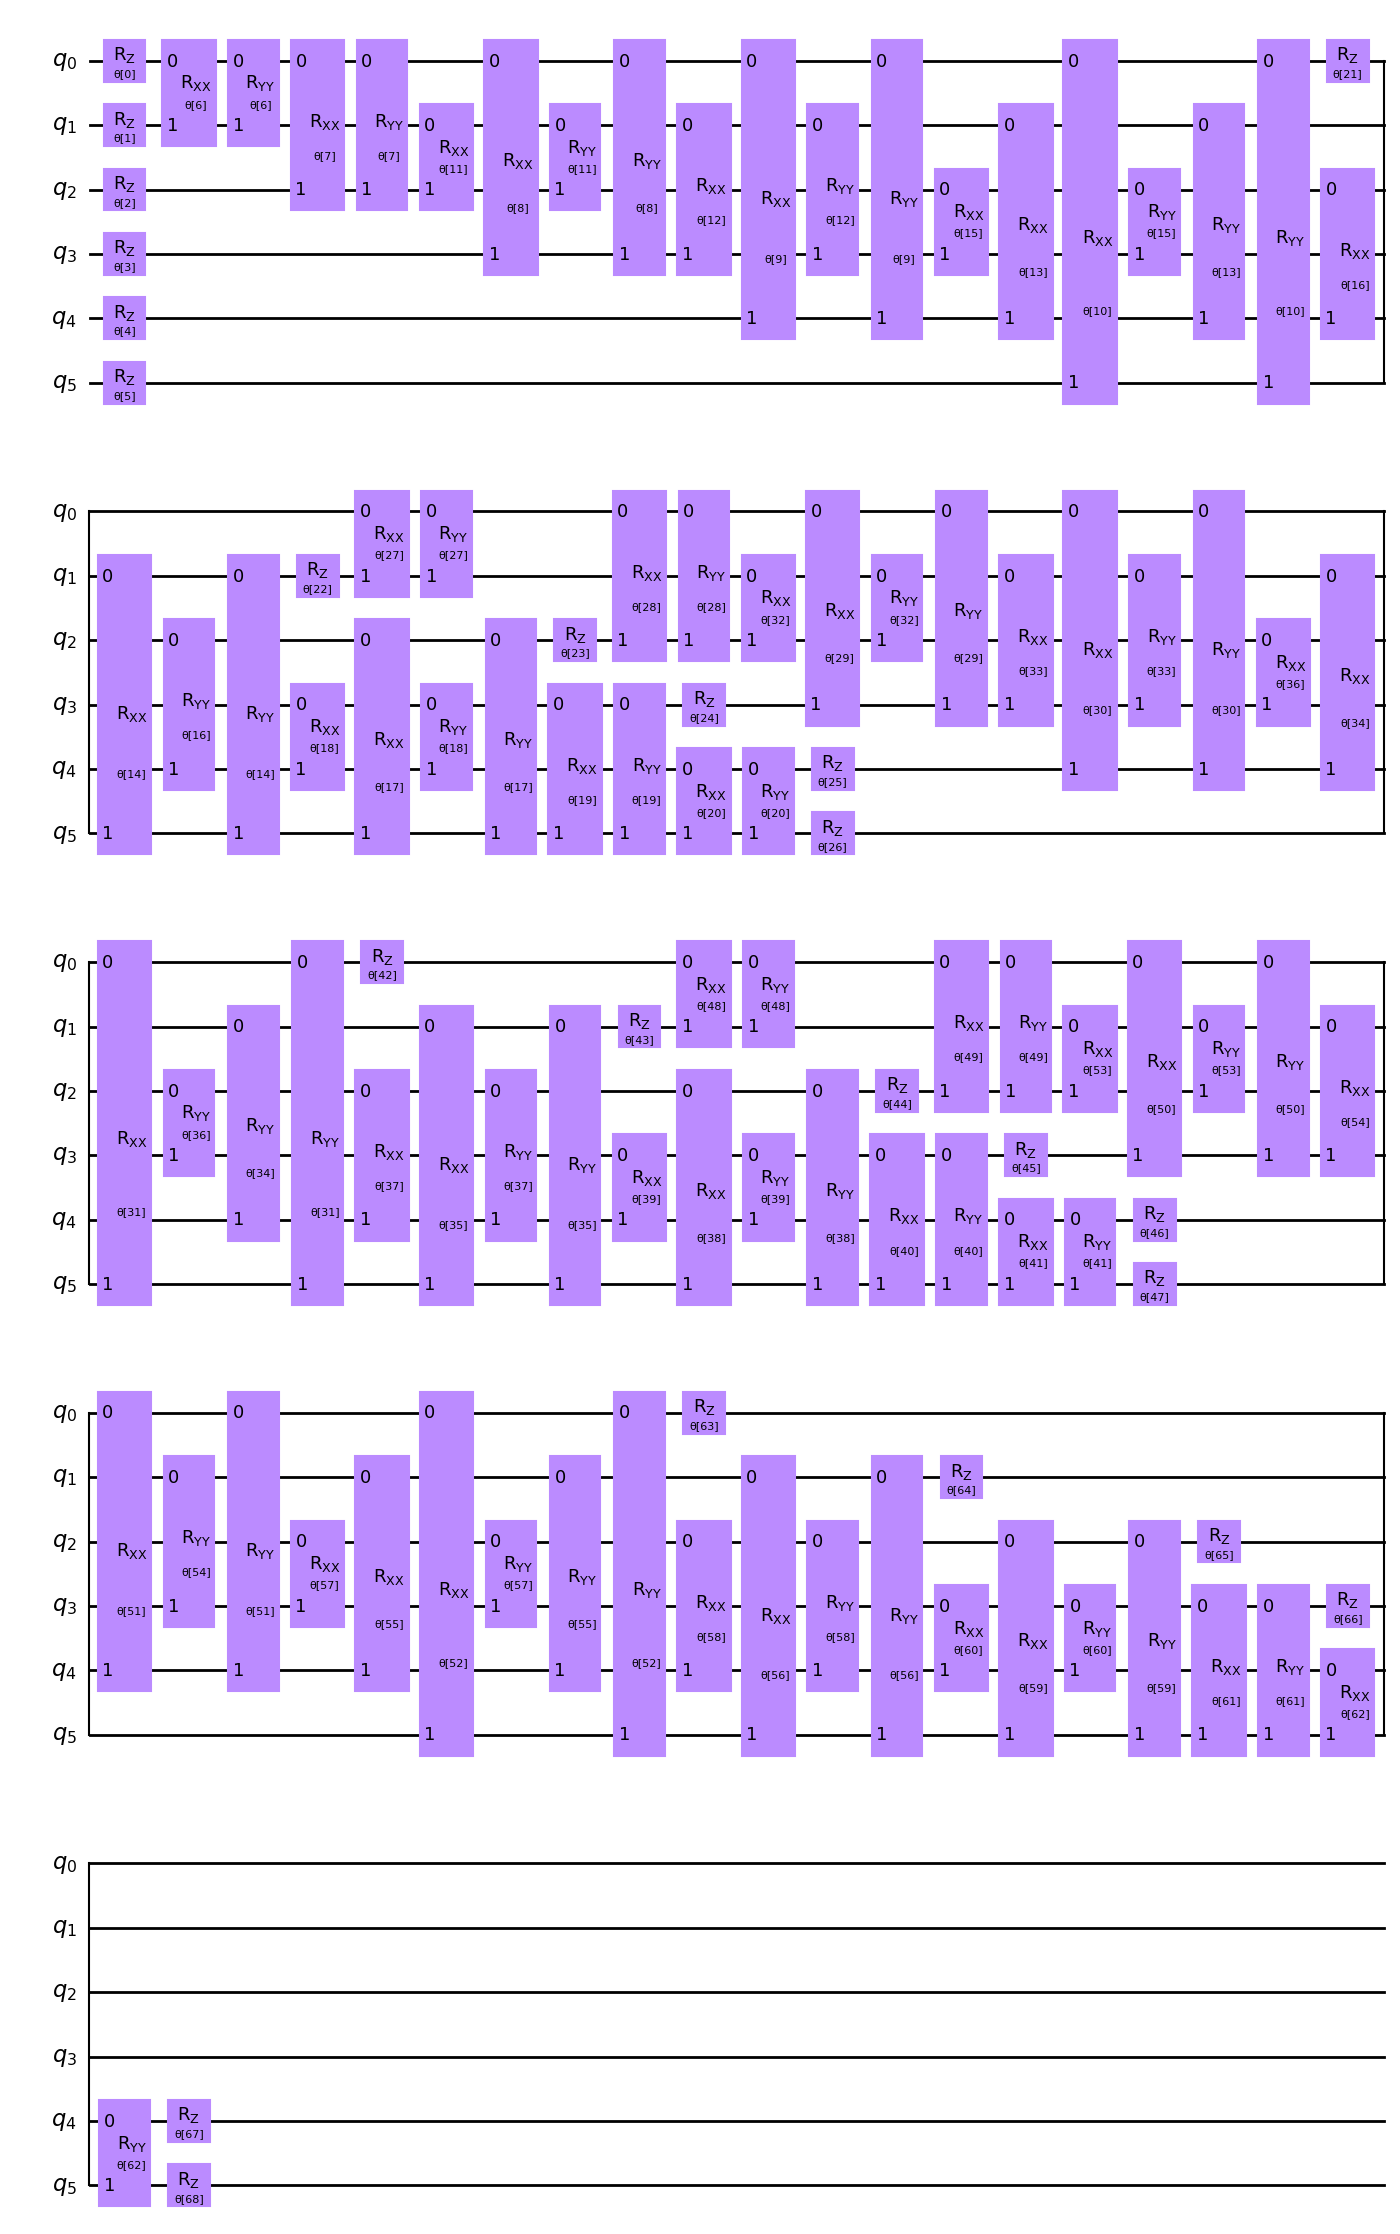

In [47]:
from qiskit.circuit.library import ExcitationPreserving
ansatz = ExcitationPreserving(num_qubits=num_features)
ansatz.decompose().draw(output="mpl", fold=20)

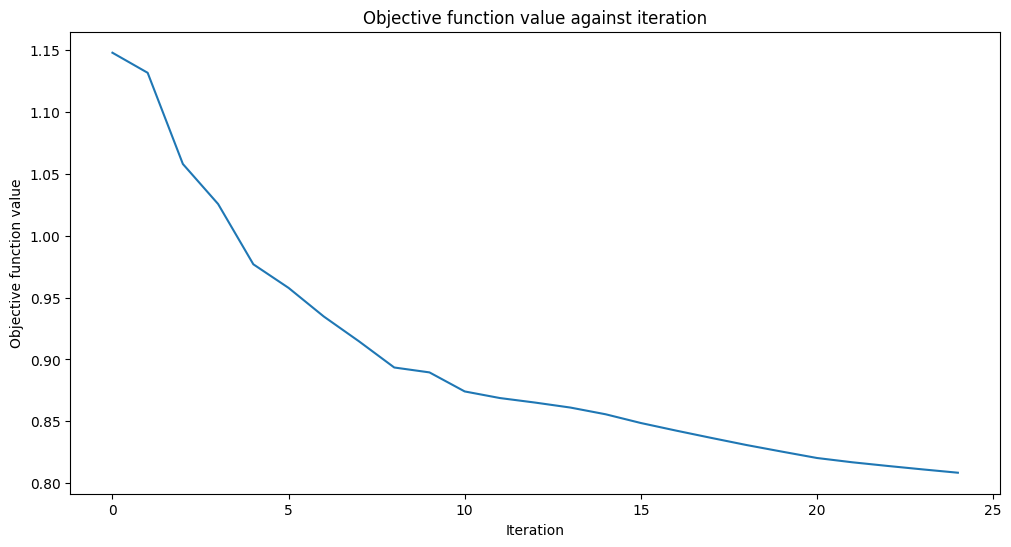

Training time: 34527 seconds


In [48]:
import time
from qiskit_machine_learning.algorithms.classifiers import VQC

vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

objective_func_vals = []

start = time.time()
vqc.fit(X_train_np, y_train_np)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

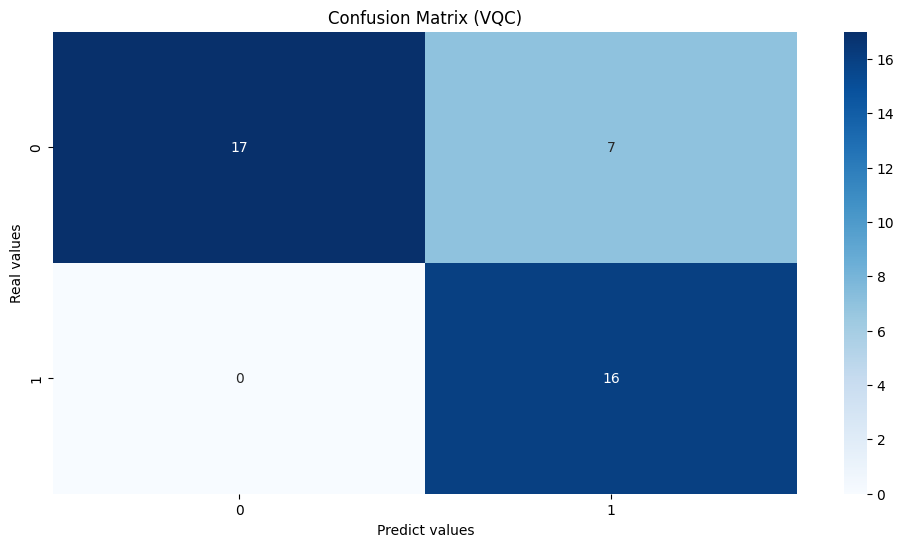

In [49]:
import matplotlib.pyplot as plot
from sklearn.metrics import confusion_matrix
q_predictions = vqc.predict(X_test_np)
confusion2 = confusion_matrix(y_test_np, q_predictions)
sns.heatmap(confusion2, annot = True, cmap = "Blues", fmt = "d")
plot.xlabel("Predict values")
plot.ylabel("Real values")
plot.title("Confusion Matrix (VQC)")
plot.show()

In [50]:
train_score_q4 = vqc.score(X_train_np, y_train_np)
test_score_q4 = vqc.score(X_test_np, y_test_np)

print(f"Quantum VQC on the training dataset: {train_score_q4:.2f}")
print(f"Quantum VQC on the test dataset:     {test_score_q4:.2f}")

Quantum VQC on the training dataset: 0.80
Quantum VQC on the test dataset:     0.82


In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_test_np, q_predictions,digits=6))

              precision    recall  f1-score   support

           0   1.000000  0.708333  0.829268        24
           1   0.695652  1.000000  0.820513        16

    accuracy                       0.825000        40
   macro avg   0.847826  0.854167  0.824891        40
weighted avg   0.878261  0.825000  0.825766        40



## COBYLA

In [52]:
from qiskit.algorithms.optimizers import COBYLA
optimizer = COBYLA(maxiter=100)

c:\Users\estre\AppData\Local\Programs\Python\Python311\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


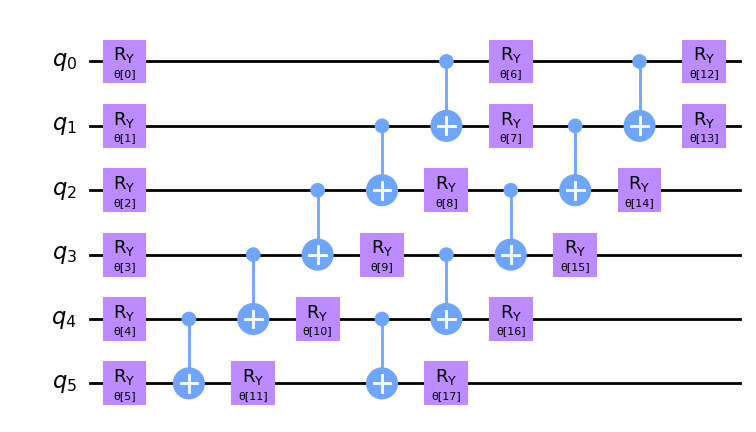

In [53]:
from qiskit.circuit.library import RealAmplitudes
ansatz = RealAmplitudes(num_qubits=num_features, reps=2)
ansatz.decompose().draw(output="mpl", fold=20)

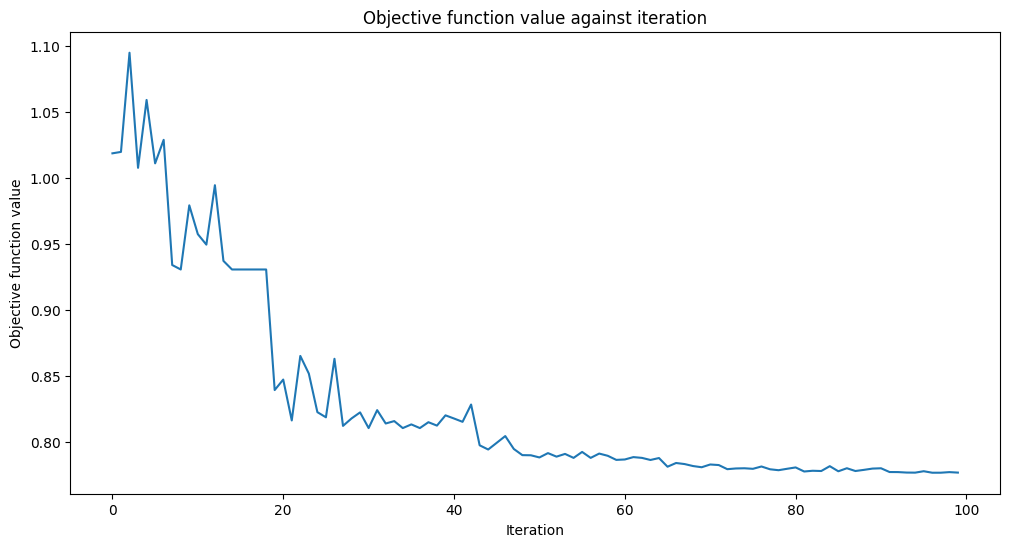

Training time: 176 seconds


In [54]:
import time
from qiskit_machine_learning.algorithms.classifiers import VQC

vqc = VQC(
    feature_map=feature_map,
    sampler=sampler,
    ansatz=ansatz,
    optimizer=optimizer,
    callback= callback_graph,
)

objective_func_vals = []

start = time.time()
vqc.fit(X_train_np, y_train_np)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

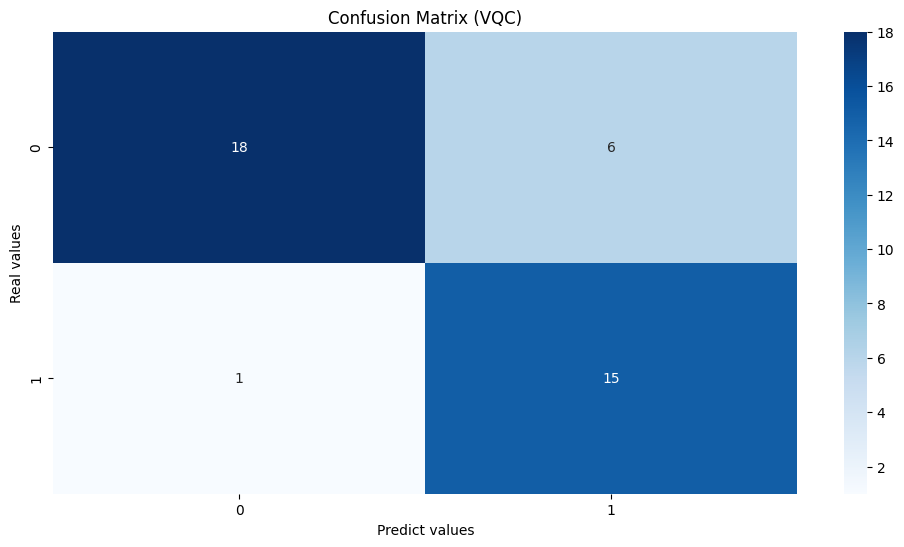

In [55]:
import matplotlib.pyplot as plot
from sklearn.metrics import confusion_matrix
q_predictions = vqc.predict(X_test_np)
confusion2 = confusion_matrix(y_test_np, q_predictions)
sns.heatmap(confusion2, annot = True, cmap = "Blues", fmt = "d")
plot.xlabel("Predict values")
plot.ylabel("Real values")
plot.title("Confusion Matrix (VQC)")
plot.show()

In [56]:
train_score_q4 = vqc.score(X_train_np, y_train_np)
test_score_q4 = vqc.score(X_test_np, y_test_np)

print(f"Quantum VQC on the training dataset: {train_score_q4:.2f}")
print(f"Quantum VQC on the test dataset:     {test_score_q4:.2f}")

Quantum VQC on the training dataset: 0.81
Quantum VQC on the test dataset:     0.82


In [57]:
from sklearn.metrics import classification_report
print(classification_report( y_test_np, q_predictions, digits=6))

              precision    recall  f1-score   support

           0   0.947368  0.750000  0.837209        24
           1   0.714286  0.937500  0.810811        16

    accuracy                       0.825000        40
   macro avg   0.830827  0.843750  0.824010        40
weighted avg   0.854135  0.825000  0.826650        40



c:\Users\estre\AppData\Local\Programs\Python\Python311\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


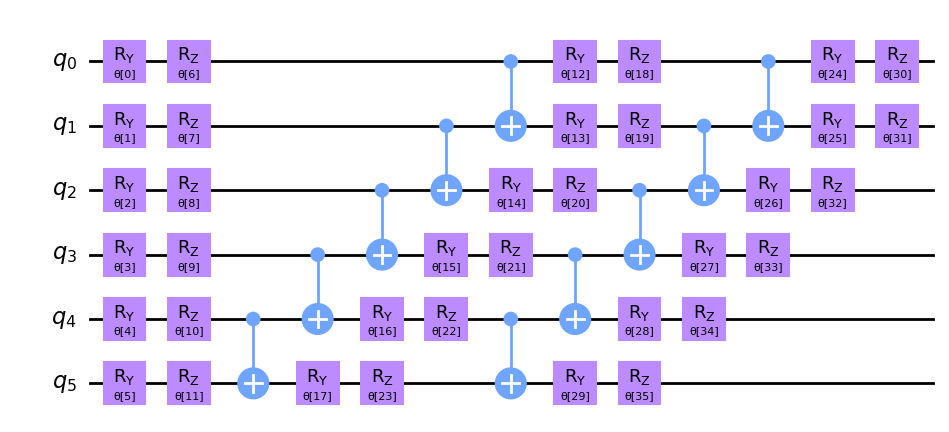

In [58]:
from qiskit.circuit.library import EfficientSU2
ansatz = EfficientSU2(num_qubits=num_features, reps=2)
ansatz.decompose().draw(output="mpl", fold=20)

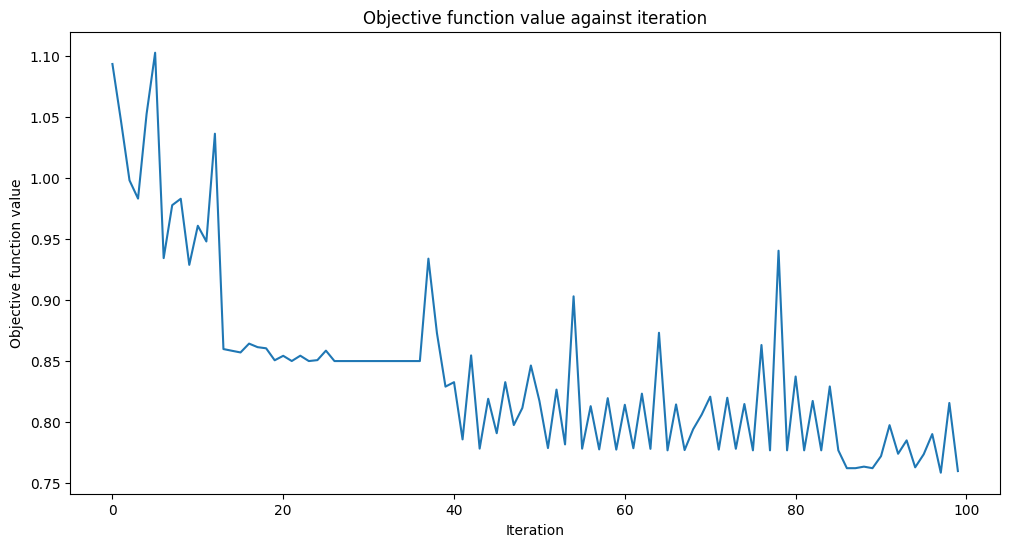

Training time: 218 seconds


In [59]:
import time
from qiskit_machine_learning.algorithms.classifiers import VQC

vqc = VQC(
    feature_map=feature_map,
    sampler=sampler,
    ansatz=ansatz,
    optimizer=optimizer,
    callback= callback_graph,
)

objective_func_vals = []

start = time.time()
vqc.fit(X_train_np, y_train_np)
elapsed = time.time() - start


print(f"Training time: {round(elapsed)} seconds")

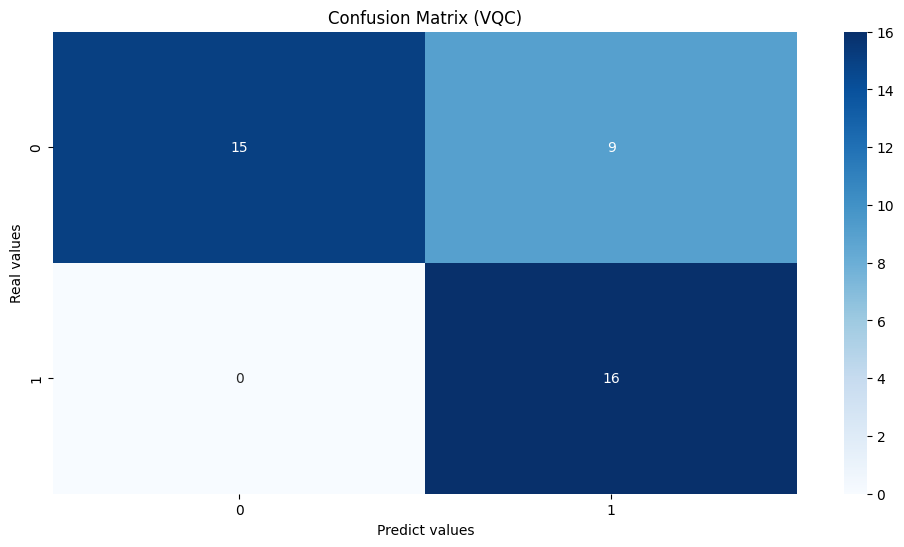

In [60]:
import matplotlib.pyplot as plot
from sklearn.metrics import confusion_matrix
q_predictions = vqc.predict(X_test_np)
confusion2 = confusion_matrix(y_test_np, q_predictions)
sns.heatmap(confusion2, annot = True, cmap = "Blues", fmt = "d")
plot.xlabel("Predict values")
plot.ylabel("Real values")
plot.title("Confusion Matrix (VQC)")
plot.show()

In [61]:
train_score_q4 = vqc.score(X_train_np, y_train_np)
test_score_q4 = vqc.score(X_test_np, y_test_np)

print(f"Quantum VQC on the training dataset: {train_score_q4:.2f}")
print(f"Quantum VQC on the test dataset:     {test_score_q4:.2f}")

Quantum VQC on the training dataset: 0.79
Quantum VQC on the test dataset:     0.78


In [62]:
from sklearn.metrics import classification_report
print(classification_report( y_test_np, q_predictions, digits=6))

              precision    recall  f1-score   support

           0   1.000000  0.625000  0.769231        24
           1   0.640000  1.000000  0.780488        16

    accuracy                       0.775000        40
   macro avg   0.820000  0.812500  0.774859        40
weighted avg   0.856000  0.775000  0.773734        40



c:\Users\estre\AppData\Local\Programs\Python\Python311\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


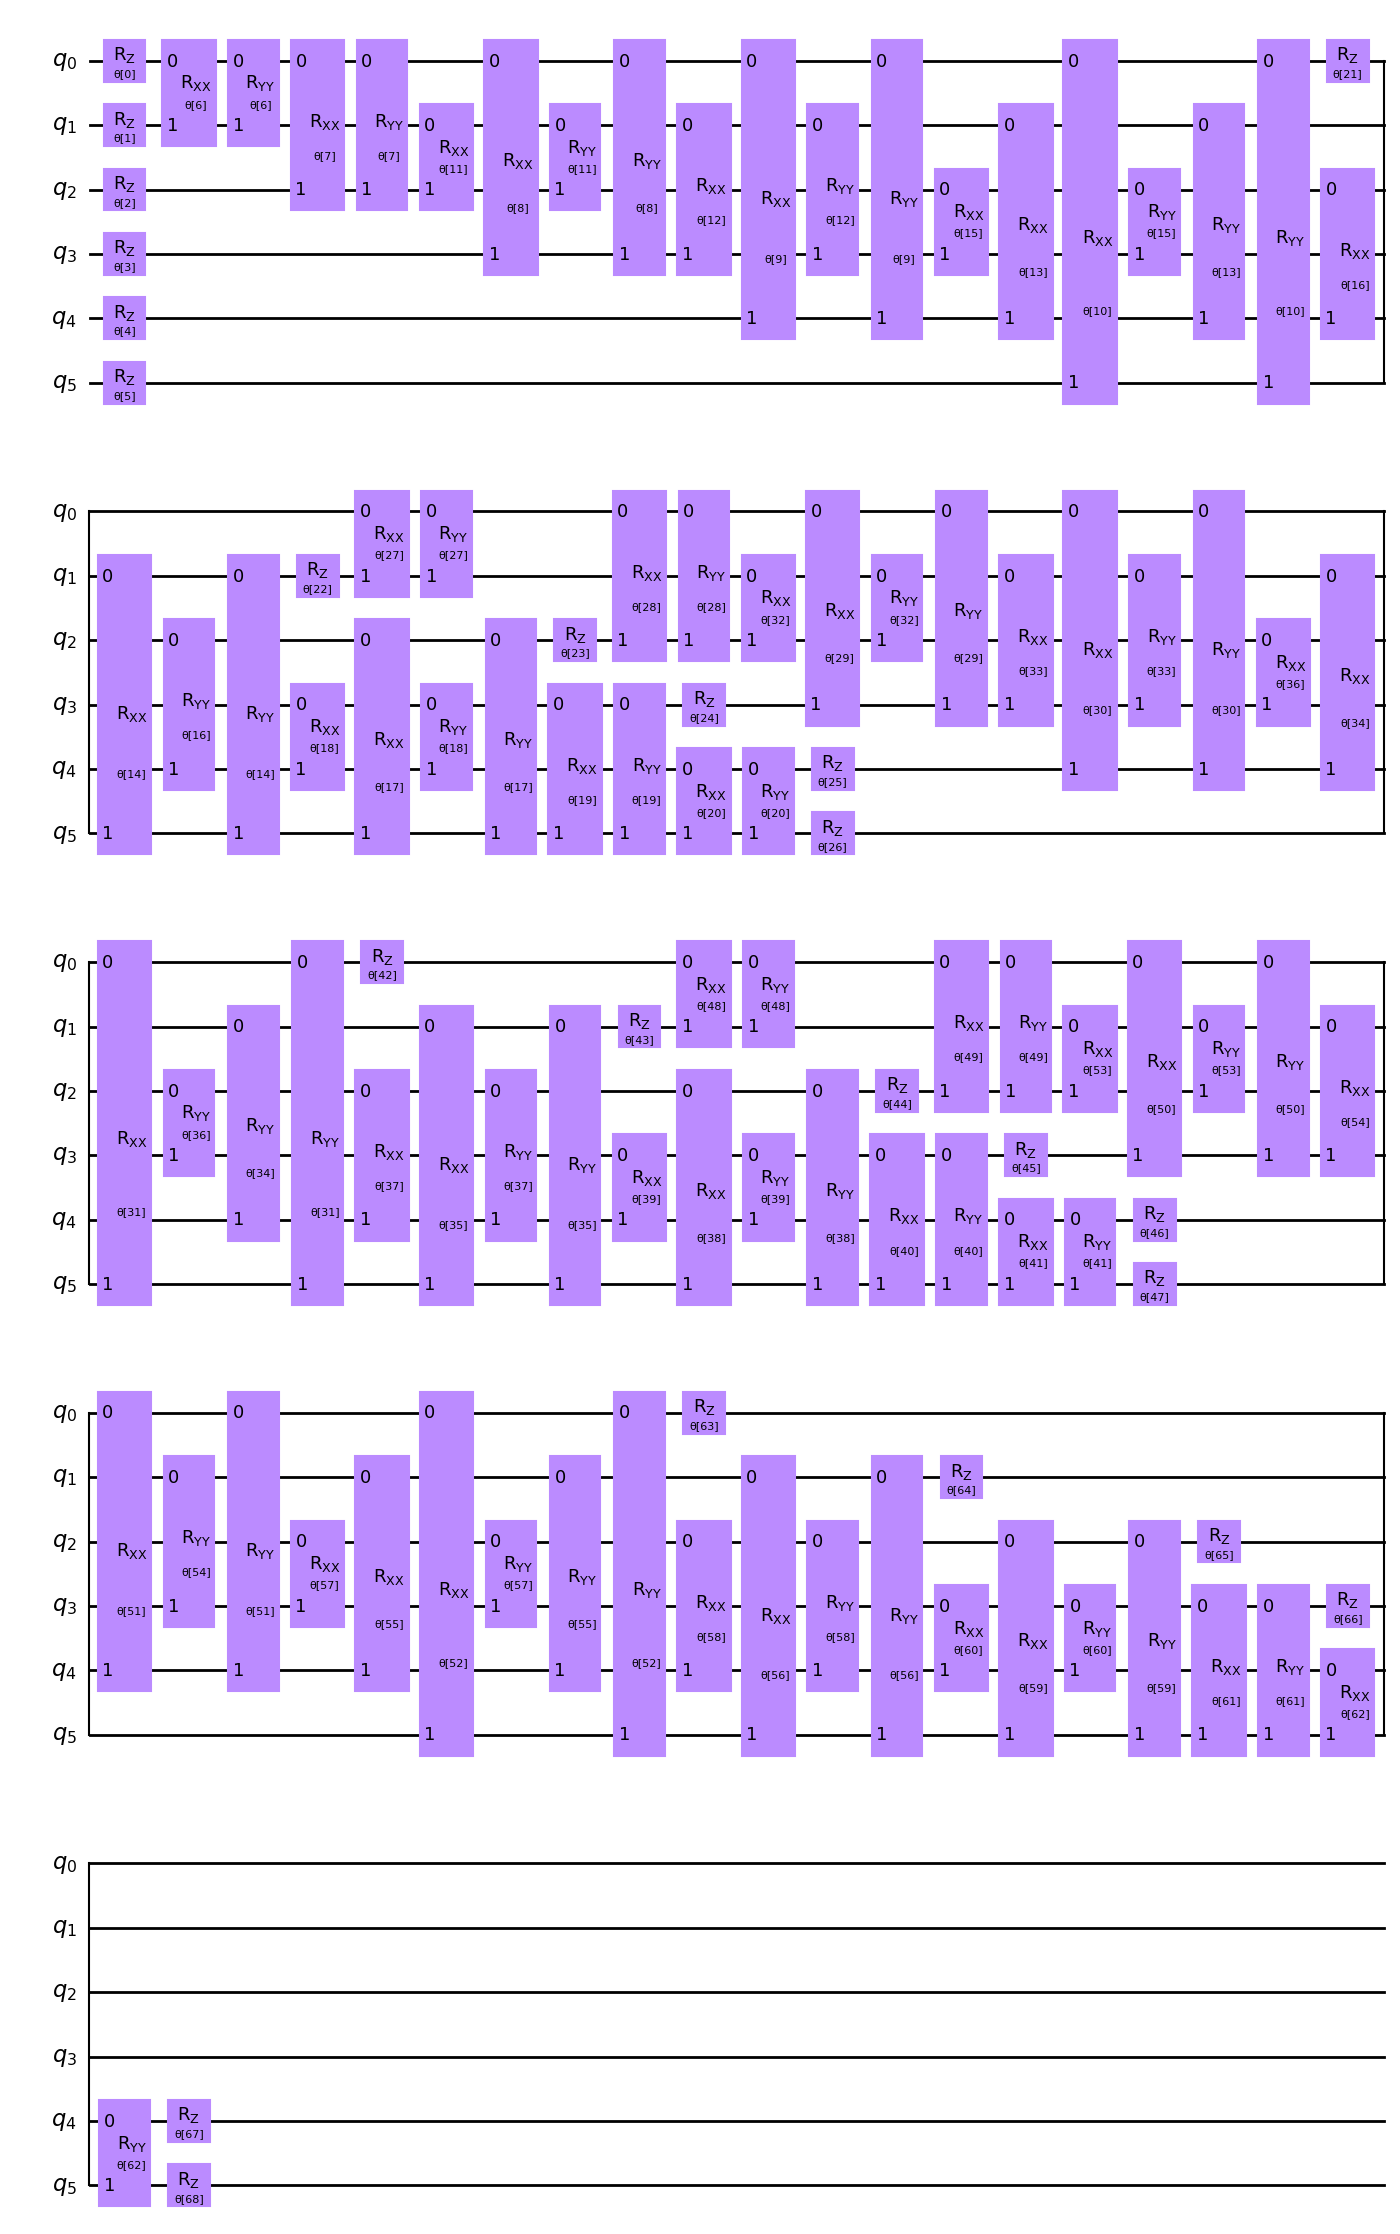

In [63]:
from qiskit.circuit.library import ExcitationPreserving
ansatz = ExcitationPreserving(num_qubits=num_features)
ansatz.decompose().draw(output="mpl", fold=20)

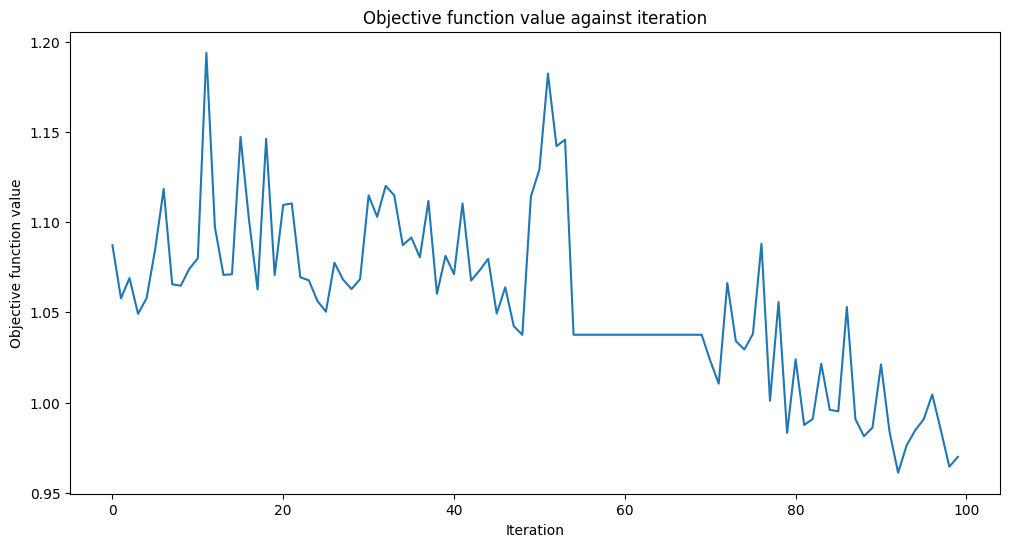

Training time: 352 seconds


In [64]:
import time
from qiskit_machine_learning.algorithms.classifiers import VQC

vqc = VQC(
    feature_map=feature_map,
    sampler=sampler,
    ansatz=ansatz,
    optimizer=optimizer,
    callback= callback_graph,
)

objective_func_vals = []

start = time.time()
vqc.fit(X_train_np, y_train_np)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

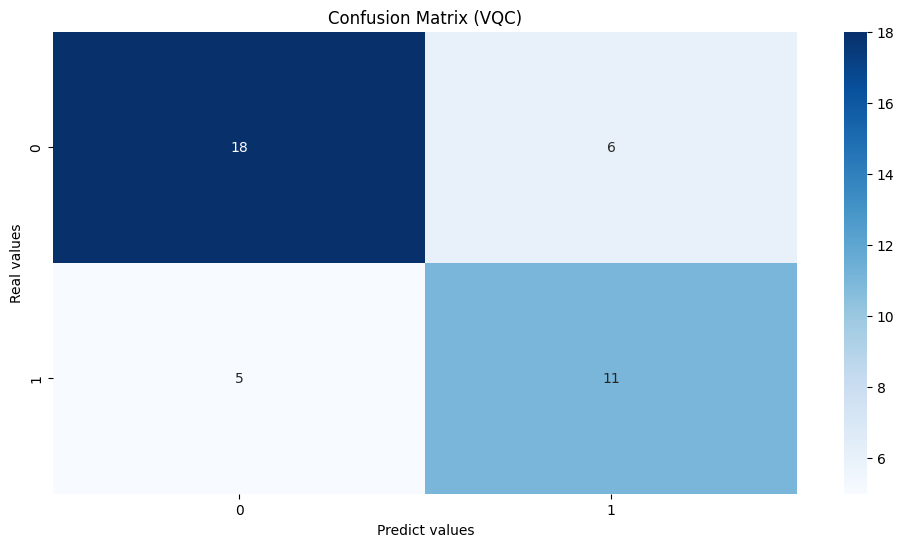

In [65]:
import matplotlib.pyplot as plot
from sklearn.metrics import confusion_matrix
q_predictions = vqc.predict(X_test_np)
confusion2 = confusion_matrix(y_test_np, q_predictions)
sns.heatmap(confusion2, annot = True, cmap = "Blues", fmt = "d")
plot.xlabel("Predict values")
plot.ylabel("Real values")
plot.title("Confusion Matrix (VQC)")
plot.show()

In [66]:
train_score_q4 = vqc.score(X_train_np, y_train_np)
test_score_q4 = vqc.score(X_test_np, y_test_np)

print(f"Quantum VQC on the training dataset: {train_score_q4:.2f}")
print(f"Quantum VQC on the test dataset:     {test_score_q4:.2f}")

Quantum VQC on the training dataset: 0.66
Quantum VQC on the test dataset:     0.72


In [67]:
from sklearn.metrics import classification_report
print(classification_report( y_test_np, q_predictions, digits=6))

              precision    recall  f1-score   support

           0   0.782609  0.750000  0.765957        24
           1   0.647059  0.687500  0.666667        16

    accuracy                       0.725000        40
   macro avg   0.714834  0.718750  0.716312        40
weighted avg   0.728389  0.725000  0.726241        40



## Gradiant Descents

In [68]:
from qiskit.algorithms.optimizers import GradientDescent
optimizer = GradientDescent(maxiter=25)

c:\Users\estre\AppData\Local\Programs\Python\Python311\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


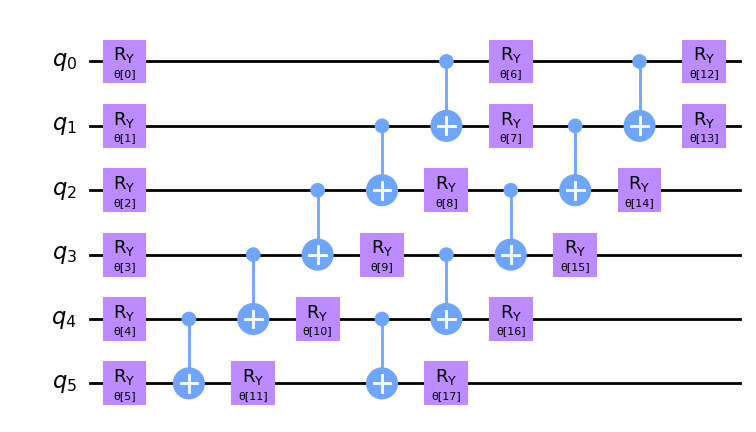

In [69]:
from qiskit.circuit.library import RealAmplitudes
ansatz = RealAmplitudes(num_qubits=num_features, reps=2)
ansatz.decompose().draw(output="mpl", fold=20)

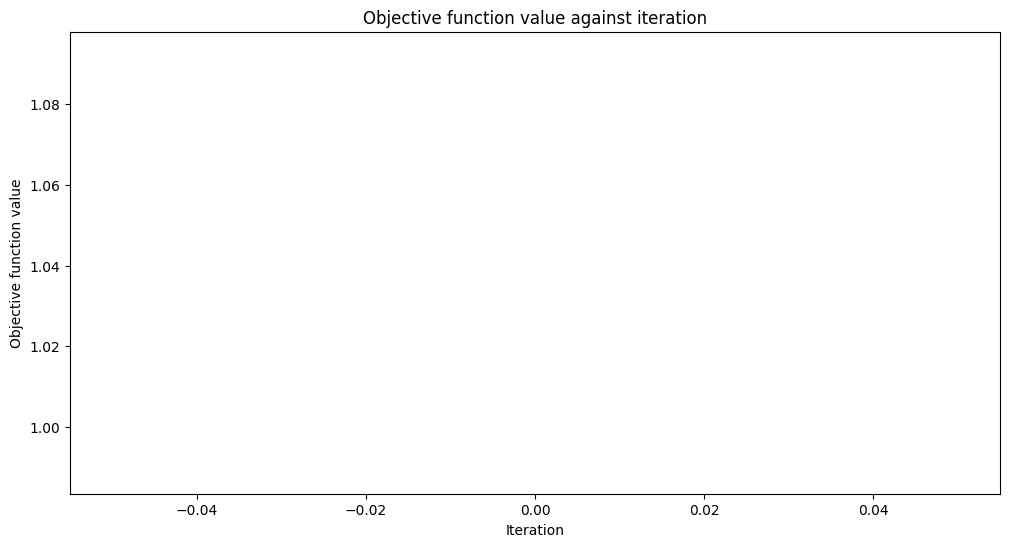

Training time: 3809 seconds


In [70]:
import time
from qiskit_machine_learning.algorithms.classifiers import VQC

vqc = VQC(
    feature_map=feature_map,
    sampler=sampler,
    ansatz=ansatz,
    optimizer=optimizer,
    callback= callback_graph,
)

objective_func_vals = []

start = time.time()
vqc.fit(X_train_np, y_train_np)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

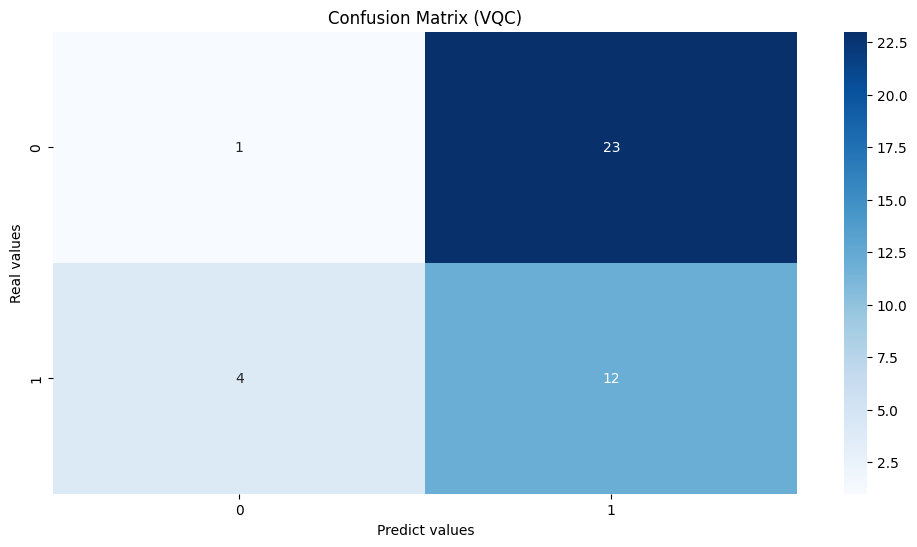

In [71]:
import matplotlib.pyplot as plot
from sklearn.metrics import confusion_matrix
q_predictions = vqc.predict(X_test_np)
confusion2 = confusion_matrix(y_test_np, q_predictions)
sns.heatmap(confusion2, annot = True, cmap = "Blues", fmt = "d")
plot.xlabel("Predict values")
plot.ylabel("Real values")
plot.title("Confusion Matrix (VQC)")
plot.show()

In [72]:
train_score_q4 = vqc.score(X_train_np, y_train_np)
test_score_q4 = vqc.score(X_test_np, y_test_np)

print(f"Quantum VQC on the training dataset: {train_score_q4:.2f}")
print(f"Quantum VQC on the test dataset:     {test_score_q4:.2f}")

Quantum VQC on the training dataset: 0.39
Quantum VQC on the test dataset:     0.33


In [73]:
from sklearn.metrics import classification_report
print(classification_report( y_test_np, q_predictions, digits=6))

              precision    recall  f1-score   support

           0   0.200000  0.041667  0.068966        24
           1   0.342857  0.750000  0.470588        16

    accuracy                       0.325000        40
   macro avg   0.271429  0.395833  0.269777        40
weighted avg   0.257143  0.325000  0.229615        40



c:\Users\estre\AppData\Local\Programs\Python\Python311\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


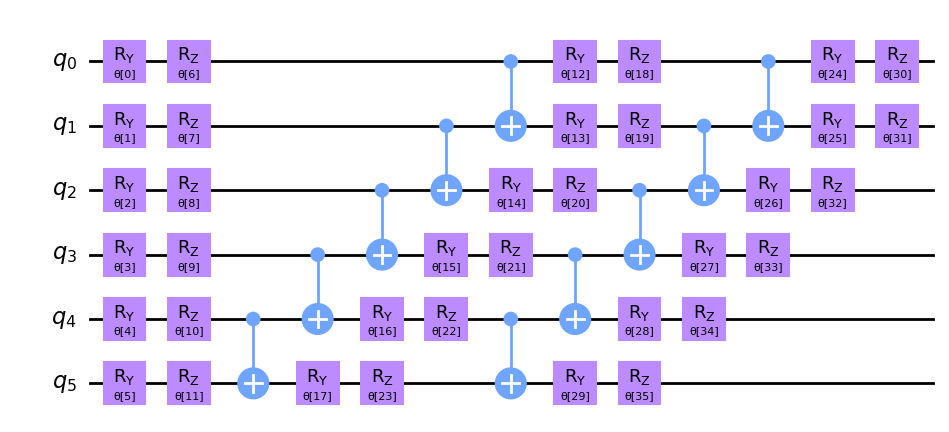

In [74]:
from qiskit.circuit.library import EfficientSU2
ansatz = EfficientSU2(num_qubits=num_features, reps=2)
ansatz.decompose().draw(output="mpl", fold=20)

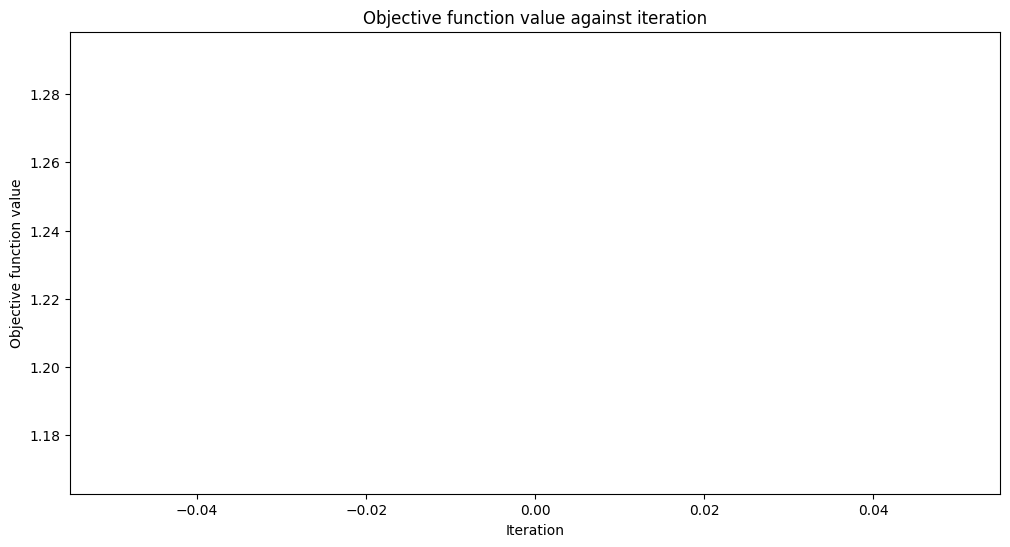

Training time: 4123 seconds


In [75]:
import time
from qiskit_machine_learning.algorithms.classifiers import VQC

vqc = VQC(
    feature_map=feature_map,
    sampler=sampler,
    ansatz=ansatz,
    optimizer=optimizer,
    callback= callback_graph,
)

objective_func_vals = []

start = time.time()
vqc.fit(X_train_np, y_train_np)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

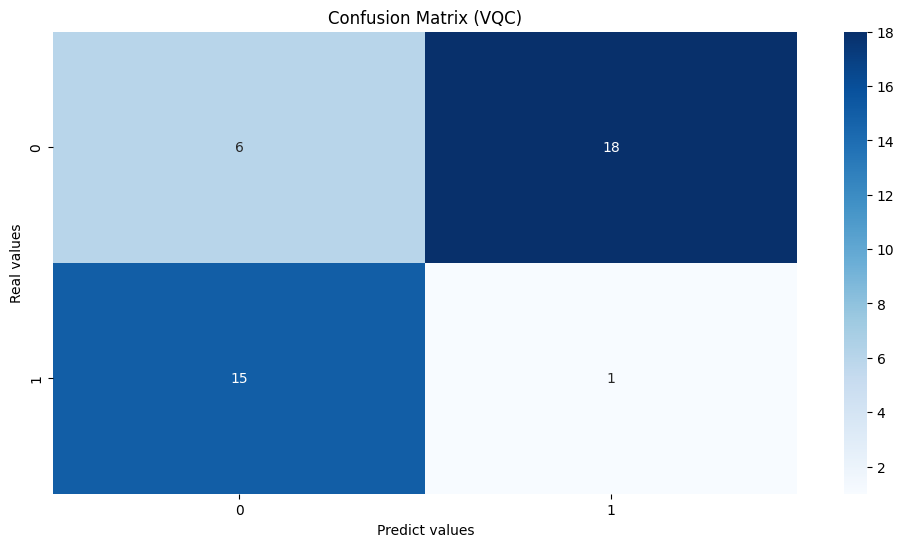

In [76]:
import matplotlib.pyplot as plot
from sklearn.metrics import confusion_matrix
q_predictions = vqc.predict(X_test_np)
confusion2 = confusion_matrix(y_test_np, q_predictions)
sns.heatmap(confusion2, annot = True, cmap = "Blues", fmt = "d")
plot.xlabel("Predict values")
plot.ylabel("Real values")
plot.title("Confusion Matrix (VQC)")
plot.show()

In [77]:
train_score_q4 = vqc.score(X_train_np, y_train_np)
test_score_q4 = vqc.score(X_test_np, y_test_np)

print(f"Quantum VQC on the training dataset: {train_score_q4:.2f}")
print(f"Quantum VQC on the test dataset:     {test_score_q4:.2f}")

Quantum VQC on the training dataset: 0.18
Quantum VQC on the test dataset:     0.17


In [78]:
from sklearn.metrics import classification_report
print(classification_report( y_test_np, q_predictions, digits=6))

              precision    recall  f1-score   support

           0   0.285714  0.250000  0.266667        24
           1   0.052632  0.062500  0.057143        16

    accuracy                       0.175000        40
   macro avg   0.169173  0.156250  0.161905        40
weighted avg   0.192481  0.175000  0.182857        40



c:\Users\estre\AppData\Local\Programs\Python\Python311\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


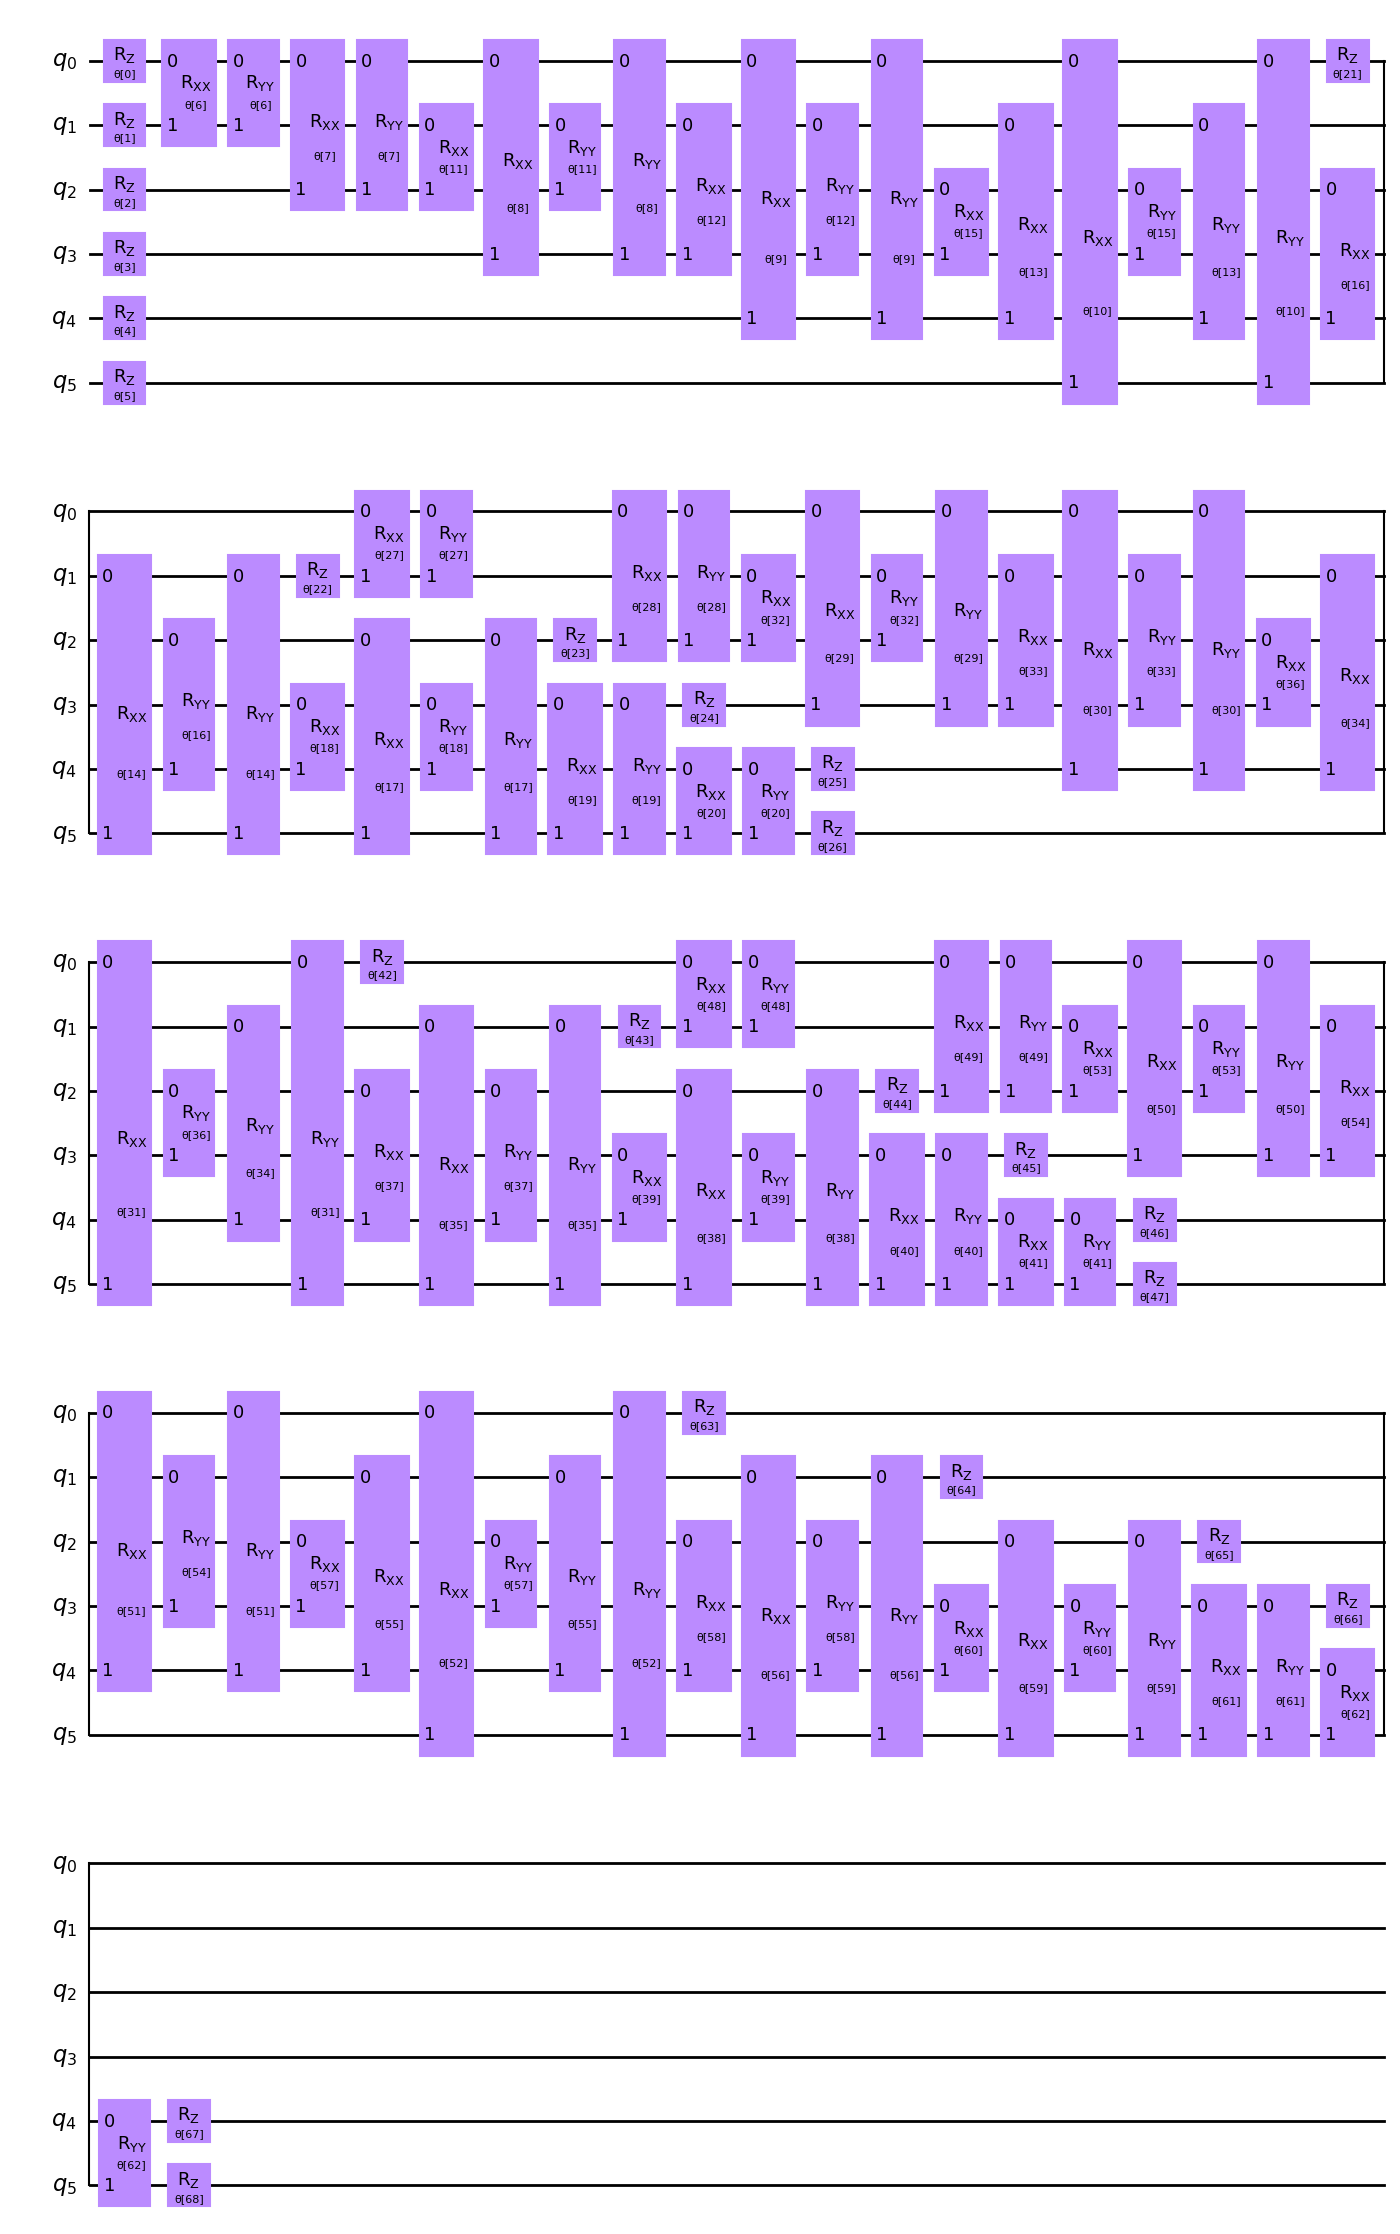

In [79]:
from qiskit.circuit.library import ExcitationPreserving
ansatz = ExcitationPreserving(num_qubits=num_features)
ansatz.decompose().draw(output="mpl", fold=20)

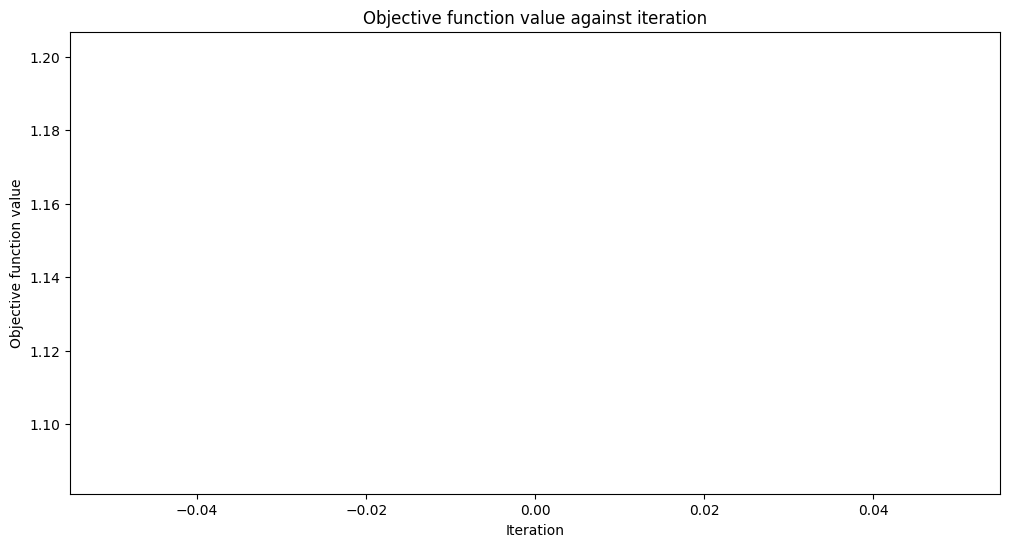

Training time: 28481 seconds


In [80]:
import time
from qiskit_machine_learning.algorithms.classifiers import VQC

vqc = VQC(
    feature_map=feature_map,
    sampler=sampler,
    ansatz=ansatz,
    optimizer=optimizer,
    callback= callback_graph,
)

objective_func_vals = []

start = time.time()
vqc.fit(X_train_np, y_train_np)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

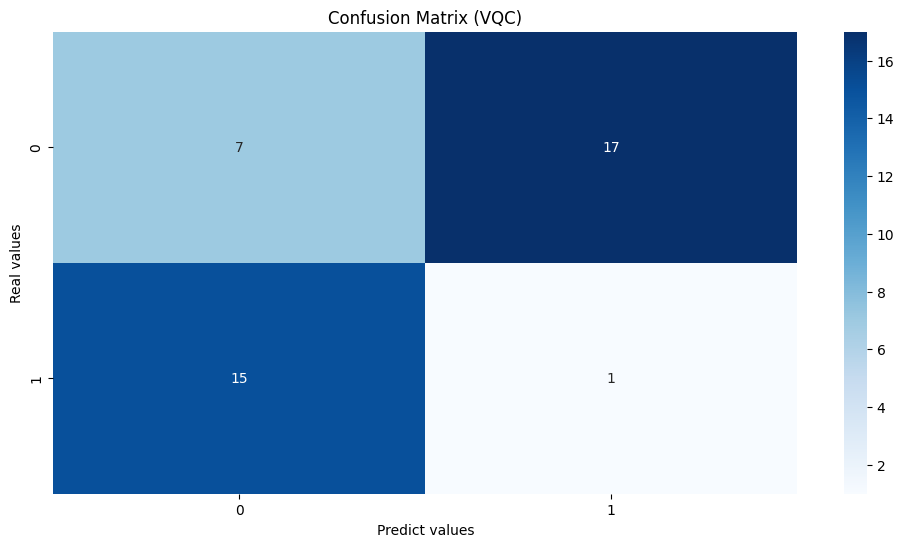

In [81]:
import matplotlib.pyplot as plot
from sklearn.metrics import confusion_matrix
q_predictions = vqc.predict(X_test_np)
confusion2 = confusion_matrix(y_test_np, q_predictions)
sns.heatmap(confusion2, annot = True, cmap = "Blues", fmt = "d")
plot.xlabel("Predict values")
plot.ylabel("Real values")
plot.title("Confusion Matrix (VQC)")
plot.show()

In [82]:
train_score_q4 = vqc.score(X_train_np, y_train_np)
test_score_q4 = vqc.score(X_test_np, y_test_np)

print(f"Quantum VQC on the training dataset: {train_score_q4:.2f}")
print(f"Quantum VQC on the test dataset:     {test_score_q4:.2f}")

Quantum VQC on the training dataset: 0.19
Quantum VQC on the test dataset:     0.20


In [83]:
from sklearn.metrics import classification_report
print(classification_report( y_test_np, q_predictions, digits=6))

              precision    recall  f1-score   support

           0   0.318182  0.291667  0.304348        24
           1   0.055556  0.062500  0.058824        16

    accuracy                       0.200000        40
   macro avg   0.186869  0.177083  0.181586        40
weighted avg   0.213131  0.200000  0.206138        40



## SPSA

In [84]:
from qiskit.algorithms.optimizers import SPSA
optimizer = SPSA(maxiter=100)

c:\Users\estre\AppData\Local\Programs\Python\Python311\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


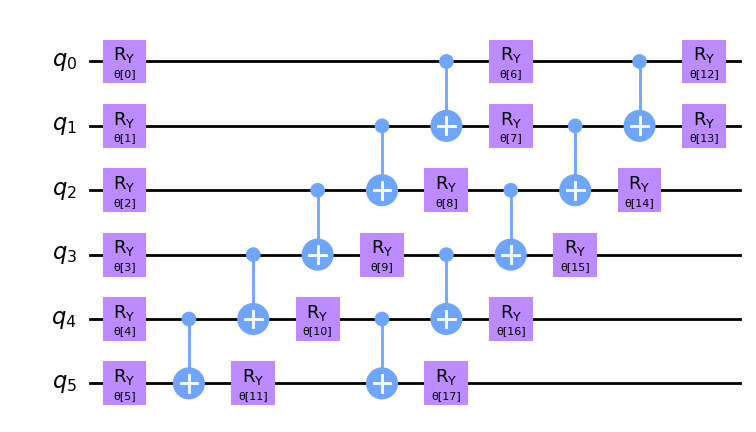

In [85]:
from qiskit.circuit.library import RealAmplitudes
ansatz = RealAmplitudes(num_qubits=num_features, reps=2)
ansatz.decompose().draw(output="mpl", fold=20)

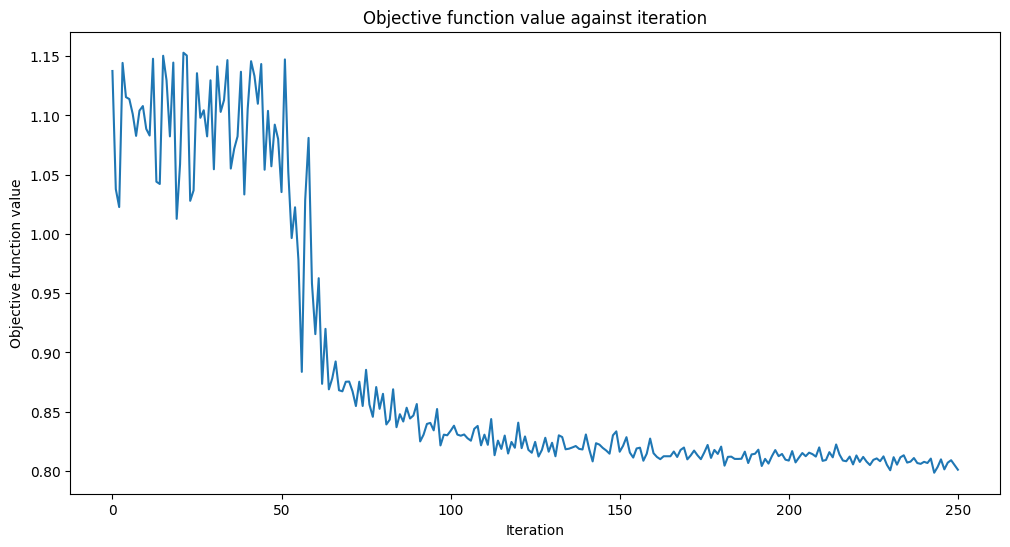

Training time: 1604 seconds


In [86]:
import time
from qiskit_machine_learning.algorithms.classifiers import VQC

vqc = VQC(
    feature_map=feature_map,
    sampler=sampler,
    ansatz=ansatz,
    optimizer=optimizer,
    callback= callback_graph,
)

objective_func_vals = []

start = time.time()
vqc.fit(X_train_np, y_train_np)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

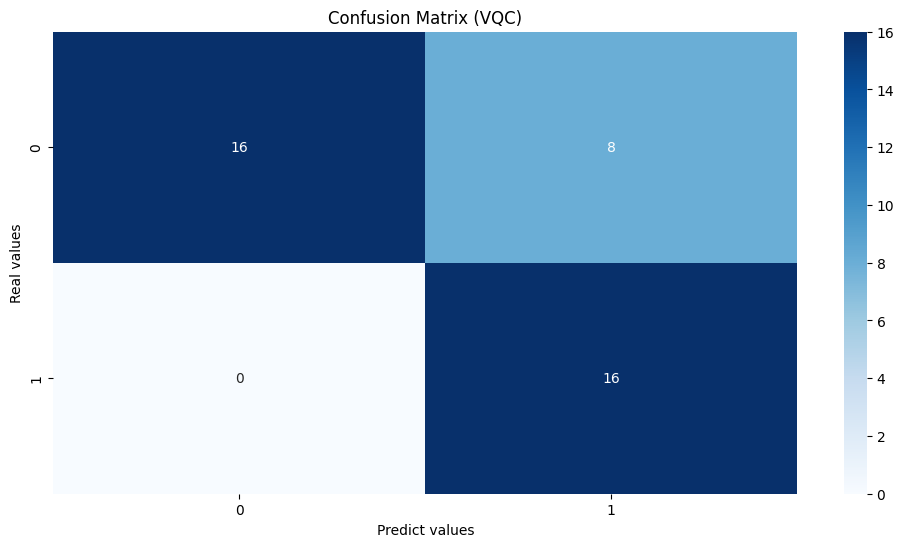

In [87]:
import matplotlib.pyplot as plot
from sklearn.metrics import confusion_matrix
q_predictions = vqc.predict(X_test_np)
confusion2 = confusion_matrix(y_test_np, q_predictions)
sns.heatmap(confusion2, annot = True, cmap = "Blues", fmt = "d")
plot.xlabel("Predict values")
plot.ylabel("Real values")
plot.title("Confusion Matrix (VQC)")
plot.show()

In [88]:
train_score_q4 = vqc.score(X_train_np, y_train_np)
test_score_q4 = vqc.score(X_test_np, y_test_np)

print(f"Quantum VQC on the training dataset: {train_score_q4:.2f}")
print(f"Quantum VQC on the test dataset:     {test_score_q4:.2f}")

Quantum VQC on the training dataset: 0.81
Quantum VQC on the test dataset:     0.80


In [89]:
from sklearn.metrics import classification_report
print(classification_report( y_test_np, q_predictions, digits=6))

              precision    recall  f1-score   support

           0   1.000000  0.666667  0.800000        24
           1   0.666667  1.000000  0.800000        16

    accuracy                       0.800000        40
   macro avg   0.833333  0.833333  0.800000        40
weighted avg   0.866667  0.800000  0.800000        40



c:\Users\estre\AppData\Local\Programs\Python\Python311\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


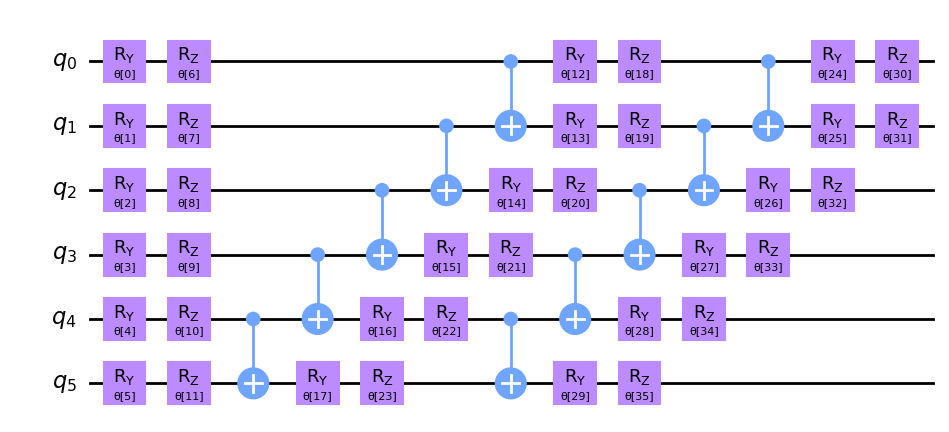

In [90]:
from qiskit.circuit.library import EfficientSU2
ansatz = EfficientSU2(num_qubits=num_features, reps=2)
ansatz.decompose().draw(output="mpl", fold=20)

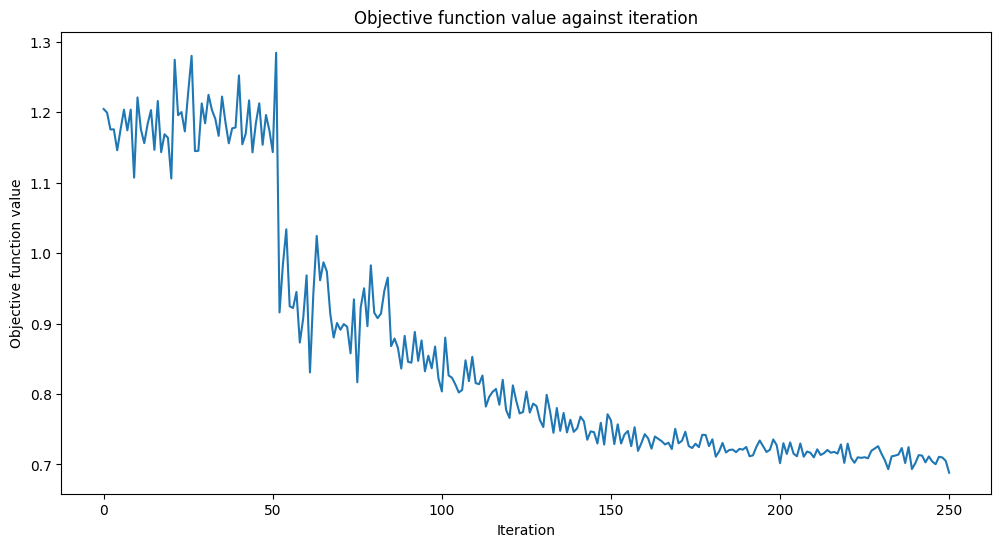

Training time: 1961 seconds


In [91]:
import time
from qiskit_machine_learning.algorithms.classifiers import VQC

vqc = VQC(
    feature_map=feature_map,
    sampler=sampler,
    ansatz=ansatz,
    optimizer=optimizer,
    callback= callback_graph,
)

objective_func_vals = []

start = time.time()
vqc.fit(X_train_np, y_train_np)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

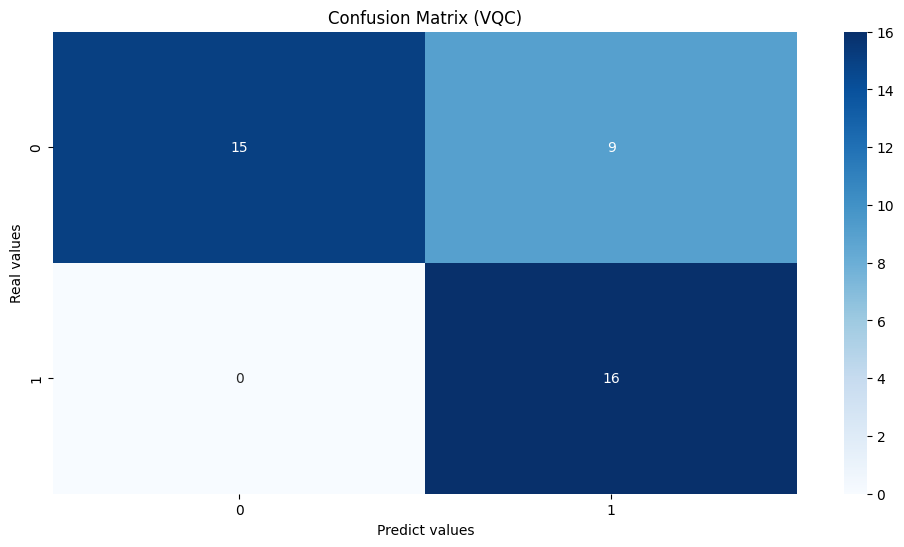

In [92]:
import matplotlib.pyplot as plot
from sklearn.metrics import confusion_matrix
q_predictions = vqc.predict(X_test_np)
confusion2 = confusion_matrix(y_test_np, q_predictions)
sns.heatmap(confusion2, annot = True, cmap = "Blues", fmt = "d")
plot.xlabel("Predict values")
plot.ylabel("Real values")
plot.title("Confusion Matrix (VQC)")
plot.show()

In [93]:
train_score_q4 = vqc.score(X_train_np, y_train_np)
test_score_q4 = vqc.score(X_test_np, y_test_np)

print(f"Quantum VQC on the training dataset: {train_score_q4:.2f}")
print(f"Quantum VQC on the test dataset:     {test_score_q4:.2f}")

Quantum VQC on the training dataset: 0.78
Quantum VQC on the test dataset:     0.78


In [94]:
from sklearn.metrics import classification_report
print(classification_report( y_test_np, q_predictions, digits=6))

              precision    recall  f1-score   support

           0   1.000000  0.625000  0.769231        24
           1   0.640000  1.000000  0.780488        16

    accuracy                       0.775000        40
   macro avg   0.820000  0.812500  0.774859        40
weighted avg   0.856000  0.775000  0.773734        40



c:\Users\estre\AppData\Local\Programs\Python\Python311\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


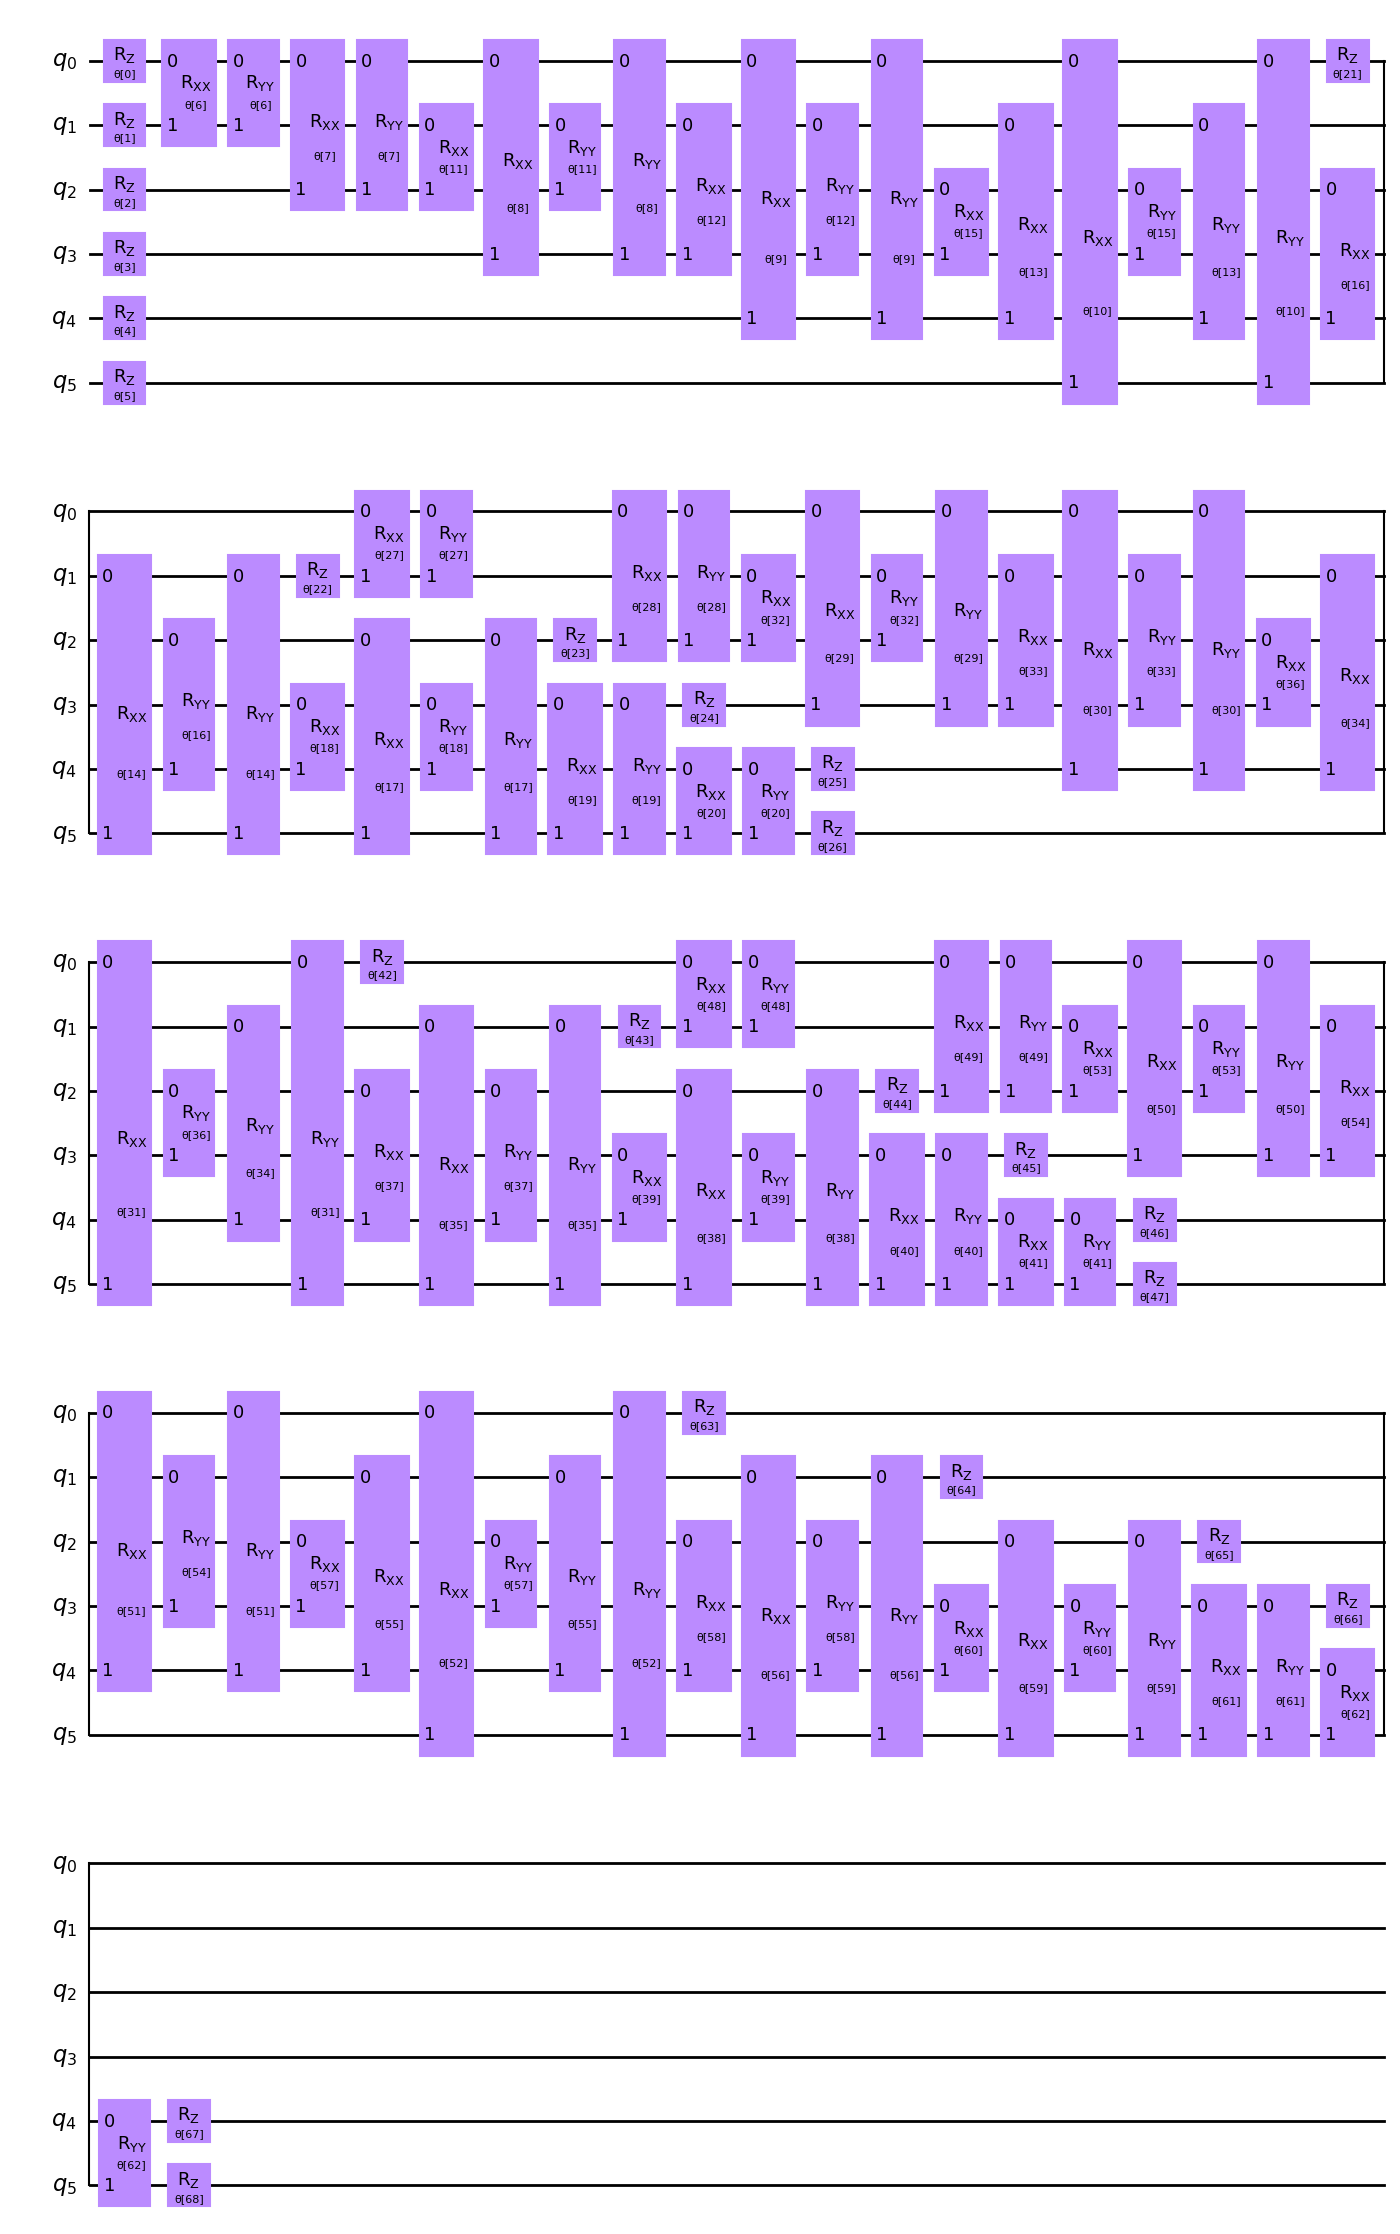

In [95]:
from qiskit.circuit.library import ExcitationPreserving
ansatz = ExcitationPreserving(num_qubits=num_features)
ansatz.decompose().draw(output="mpl", fold=20)

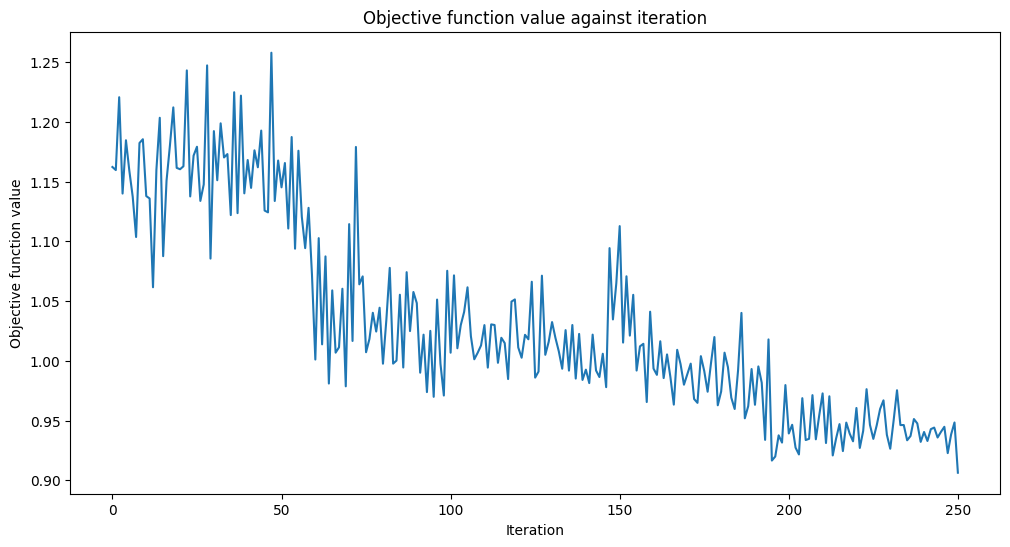

Training time: 1627 seconds


In [96]:
import time
from qiskit_machine_learning.algorithms.classifiers import VQC

vqc = VQC(
    feature_map=feature_map,
    sampler=sampler,
    ansatz=ansatz,
    optimizer=optimizer,
    callback= callback_graph,
)

objective_func_vals = []

start = time.time()
vqc.fit(X_train_np, y_train_np)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

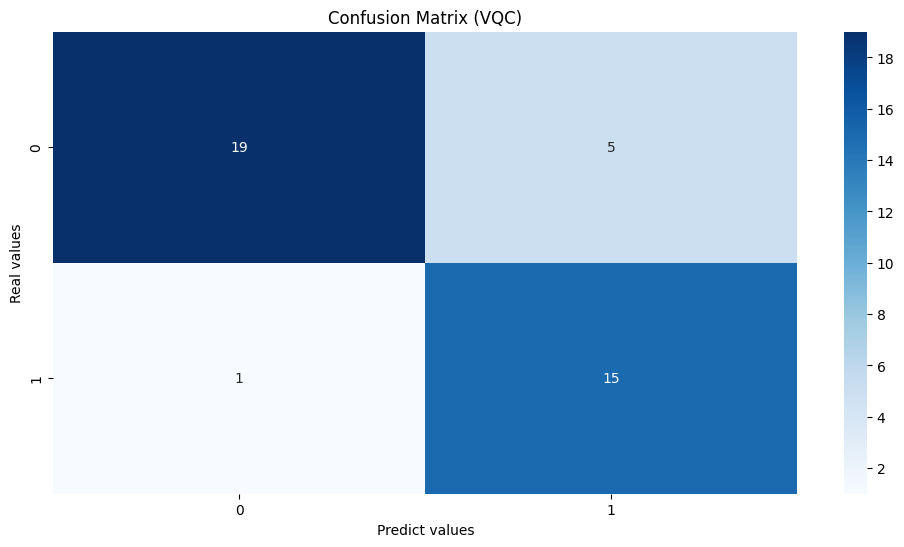

In [97]:
import matplotlib.pyplot as plot
from sklearn.metrics import confusion_matrix
q_predictions = vqc.predict(X_test_np)
confusion2 = confusion_matrix(y_test_np, q_predictions)
sns.heatmap(confusion2, annot = True, cmap = "Blues", fmt = "d")
plot.xlabel("Predict values")
plot.ylabel("Real values")
plot.title("Confusion Matrix (VQC)")
plot.show()

In [98]:
train_score_q4 = vqc.score(X_train_np, y_train_np)
test_score_q4 = vqc.score(X_test_np, y_test_np)

print(f"Quantum VQC on the training dataset: {train_score_q4:.2f}")
print(f"Quantum VQC on the test dataset:     {test_score_q4:.2f}")

Quantum VQC on the training dataset: 0.82
Quantum VQC on the test dataset:     0.85


In [99]:
from sklearn.metrics import classification_report
print(classification_report( y_test_np, q_predictions, digits=6))

              precision    recall  f1-score   support

           0   0.950000  0.791667  0.863636        24
           1   0.750000  0.937500  0.833333        16

    accuracy                       0.850000        40
   macro avg   0.850000  0.864583  0.848485        40
weighted avg   0.870000  0.850000  0.851515        40



## Utilizando Pegasus

In [100]:
import numpy as np
X_train_np = np.array(features_train.values)
y_train_np = labels_train.values

In [101]:
import numpy as np
X_test_np = np.array(features_test.values)
y_test_np = labels_test.values

In [102]:
# number of qubits is equal to the number of features
num_qubits = len(features.columns)

# number of steps performed during the training procedure
tau = 100

# regularization parameter
C = 1000

In [103]:
from qiskit import BasicAer
from qiskit.circuit.library import ZFeatureMap
from qiskit_algorithms.utils import algorithm_globals

from qiskit_machine_learning.kernels import FidelityQuantumKernel

algorithm_globals.random_seed = 12345

feature_map = ZFeatureMap(feature_dimension=num_qubits, reps=1)

qkernel = FidelityQuantumKernel(feature_map=feature_map)

C:\Users\estre\AppData\Local\Temp\ipykernel_16496\139360568.py:1: DeprecationWarning: BasicAer is deprecated since Qiskit 0.46 and will be removed in Qiskit 1.0. The BasicAer (qiskit.providers.basicaer) module has been superseded by  qiskit.providers.basic_provider, and all its classes have been renamed to follow a new naming convention. More information and migration guidelines can be found in the 0.46 API docs for BasicAer.
  from qiskit import BasicAer


In [104]:
from qiskit_machine_learning.algorithms import PegasosQSVC
import time
np.random.seed(123)
pegasos_qsvc = PegasosQSVC(quantum_kernel=qkernel, C=C, num_steps=tau)

# training
start = time.time()
pegasos_qsvc.fit(X_train_np, y_train_np)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

# testing
pegasos_score = pegasos_qsvc.score(X_test_np, y_test_np)
print(f"PegasosQSVC classification test score: {pegasos_score}")

Training time: 5 seconds
PegasosQSVC classification test score: 0.7


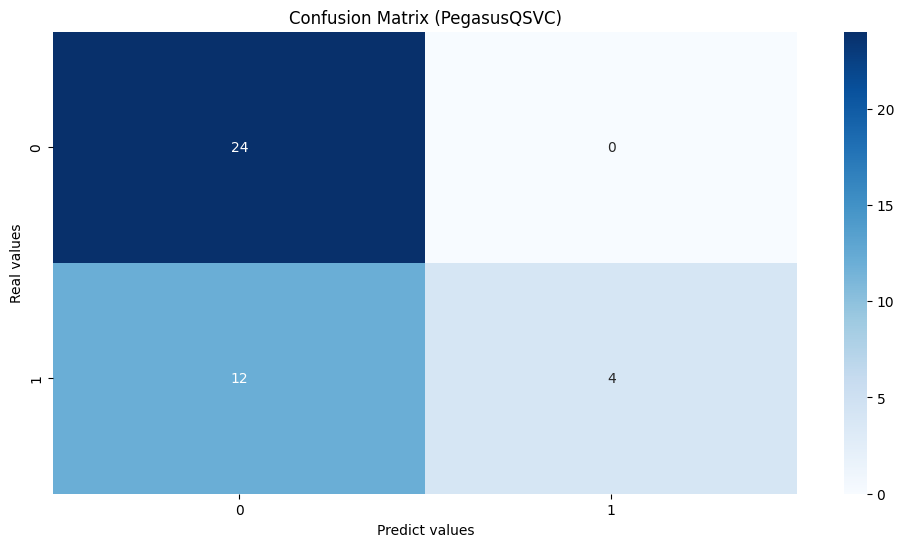

In [105]:
import matplotlib.pyplot as plot
import seaborn as sns
from sklearn.metrics import confusion_matrix
q_predictions = pegasos_qsvc.predict(X_test_np)
confusion2 = confusion_matrix(y_test_np, q_predictions)
sns.heatmap(confusion2, annot = True, cmap = "Blues", fmt = "d")
plot.xlabel("Predict values")
plot.ylabel("Real values")
plot.title("Confusion Matrix (PegasusQSVC)")
plot.show()

In [106]:
train_score_q4 = pegasos_qsvc.score(X_train_np, y_train_np)
test_score_q4 = pegasos_qsvc.score(X_test_np, y_test_np)

print(f"Quantum VQC on the training dataset: {train_score_q4:.2f}")
print(f"Quantum VQC on the test dataset:     {test_score_q4:.2f}")

Quantum VQC on the training dataset: 0.61
Quantum VQC on the test dataset:     0.70


In [107]:
from sklearn.metrics import classification_report
print(classification_report( y_test_np, q_predictions, digits=6))

              precision    recall  f1-score   support

           0   0.666667  1.000000  0.800000        24
           1   1.000000  0.250000  0.400000        16

    accuracy                       0.700000        40
   macro avg   0.833333  0.625000  0.600000        40
weighted avg   0.800000  0.700000  0.640000        40



## QSVC

In [108]:
from qiskit_machine_learning.algorithms import QSVC
from sklearn import metrics
import time
# Use QSVC for classification
qsvc = QSVC(quantum_kernel=qkernel)

# Fit the QSVC
start = time.time()
qsvc.fit(X_train_np, y_train_np)
elapsed = time.time() - start

# Predict the labels
labels_test = qsvc.predict(X_test_np)

# Evalaute the test accuracy
accuracy_test = metrics.balanced_accuracy_score(y_true=y_test_np, y_pred=labels_test)
print(f"accuracy test: {accuracy_test}")

accuracy test: 0.8645833333333333


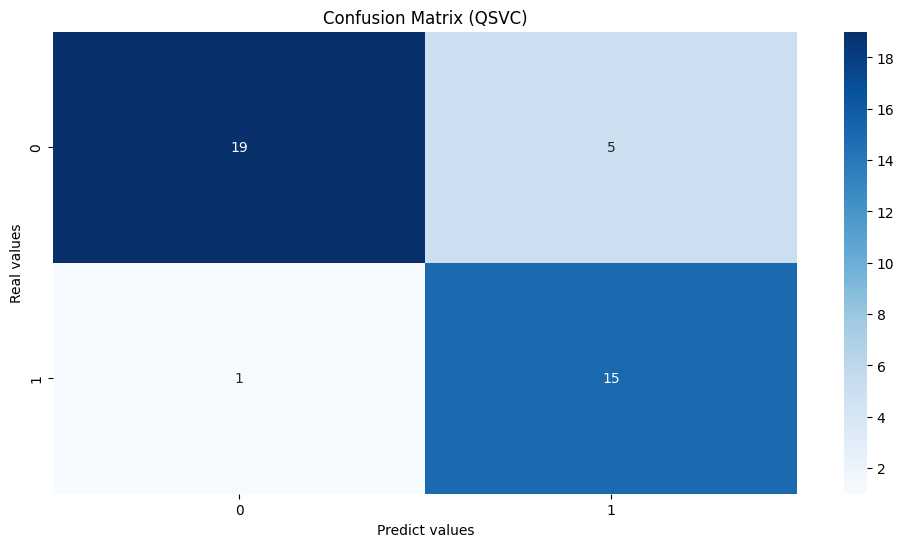

In [109]:
confusion2 = confusion_matrix(y_test_np, labels_test)
sns.heatmap(confusion2, annot = True, cmap = "Blues", fmt = "d")
plot.xlabel("Predict values")
plot.ylabel("Real values")
plot.title("Confusion Matrix (QSVC)")
plot.show()

In [110]:
train_score_q4 = qsvc.score(X_train_np, y_train_np)
test_score_q4 = qsvc.score(X_test_np, y_test_np)

print(f"Quantum VQC on the training dataset: {train_score_q4:.2f}")
print(f"Quantum VQC on the test dataset:     {test_score_q4:.2f}")

Quantum VQC on the training dataset: 0.83
Quantum VQC on the test dataset:     0.85


In [111]:
from sklearn.metrics import classification_report
print(classification_report( y_test_np, labels_test, digits=6))

              precision    recall  f1-score   support

           0   0.950000  0.791667  0.863636        24
           1   0.750000  0.937500  0.833333        16

    accuracy                       0.850000        40
   macro avg   0.850000  0.864583  0.848485        40
weighted avg   0.870000  0.850000  0.851515        40

